In [1]:
# Step- 1 Importing the necessary libraries

In [2]:
import json 
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_sm
nlp = en_core_web_sm.load()

#Importing libraries required for the case study and to plot charts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline

#Importing Regular Expressions for String manipulation
import re

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# set options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

In [3]:
# Step- 2 Data Loading-The data is in JSON format and we need to convert it to a dataframe.

In [2]:
import pandas as pd

# Define the file path
file_path = r"C:\Users\Admin\OneDrive\Desktop\Manasa Files\AI & ML\Automatic Ticket Creation -NLP\complaints-2021-05-14_08_16 (2).json"

# Load the JSON file into a DataFrame
df = pd.read_json(file_path)

# Normalize the JSON data if necessary
df = pd.json_normalize(df['_source'])  # Adjust this according to your JSON structure

# Display the first few rows of the DataFrame
print(df.head())

# Print the column names to see what data is available
print(df.columns)

# Check for NaN values in a specific column
nan_complaints = df['complaint_what_happened'].isnull().sum()
print(f"Number of NaN complaints: {nan_complaints}")

# Display rows with NaN values in the complaint text
nan_rows = df[df['complaint_what_happened'].isnull()]
print(nan_rows)

            tags zip_code complaint_id                               issue  \
0           None    90301      3211475   Attempts to collect debt not owed   
1  Servicemember    319XX      3229299     Written notification about debt   
2           None    77069      3199379  Other features, terms, or problems   
3           None    48066      2673060      Trouble during payment process   
4           None    10473      3203545                    Fees or interest   

               date_received state consumer_disputed  \
0  2019-04-13T12:00:00-05:00    CA               N/A   
1  2019-05-01T12:00:00-05:00    GA               N/A   
2  2019-04-02T12:00:00-05:00    TX               N/A   
3  2017-09-13T12:00:00-05:00    MI               N/A   
4  2019-04-05T12:00:00-05:00    NY               N/A   

                       product         company_response               company  \
0              Debt collection  Closed with explanation  JPMORGAN CHASE & CO.   
1              Debt collection  

In [4]:
import json

# Define the file path
file_path = r"C:\Users\Admin\OneDrive\Desktop\Manasa Files\AI & ML\Automatic Ticket Creation -NLP\complaints-2021-05-14_08_16 (2).json"

# Opening JSON file 
with open(file_path) as f:
    # returns JSON object as a dictionary 
    data = json.load(f)


In [6]:
# Step 3 Data Preparation Data cleaning operations like filtering text, removing missing values & renaming column headers.

In [7]:
df=pd.json_normalize(data)

In [8]:
# Inspect the dataframe to understand the given data.
df.head(10)

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,_source.consumer_disputed,_source.product,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A
5,complaint-public-v2,complaint,3275312,0.0,Older American,48227,3275312,Managing an account,2019-06-13T12:00:00-05:00,MI,N/A,Checking or savings account,Closed with monetary relief,JPMORGAN CHASE & CO.,Referral,2019-06-14T12:00:00-05:00,None,Checking account,Yes,,Problem using a debit or ATM card,N/A
6,complaint-public-v2,complaint,3238804,0.0,None,76262,3238804,Managing an account,2019-05-10T12:00:00-05:00,TX,N/A,Checking or savings account,Closed with monetary relief,JPMORGAN CHASE & CO.,Phone,2019-05-10T12:00:00-05:00,None,Checking account,Yes,,Problem using a debit or ATM card,N/A
7,complaint-public-v2,complaint,3249272,0.0,None,07753,3249272,Trouble during payment process,2019-05-15T12:00:00-05:00,NJ,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-05-21T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,N/A
8,complaint-public-v2,complaint,3351653,0.0,None,60621,3351653,Closing an account,2019-08-22T12:00:00-05:00,IL,N/A,Checking or savings account,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-08-23T12:00:00-05:00,None,Checking account,Yes,,Company closed your account,N/A
9,complaint-public-v2,complaint,3273612,0.0,None,99354,3273612,Managing an account,2019-06-11T12:00:00-05:00,WA,N/A,Checking or savings account,Closed with monetary relief,JPMORGAN CHASE & CO.,Referral,2019-06-17T12:00:00-05:00,None,Checking account,Yes,,Cashing a check,N/A


In [9]:
#print the column names
df.columns

Index(['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code',
       '_source.complaint_id', '_source.issue', '_source.date_received',
       '_source.state', '_source.consumer_disputed', '_source.product',
       '_source.company_response', '_source.company', '_source.submitted_via',
       '_source.date_sent_to_company', '_source.company_public_response',
       '_source.sub_product', '_source.timely',
       '_source.complaint_what_happened', '_source.sub_issue',
       '_source.consumer_consent_provided'],
      dtype='object')

In [10]:
#Assign new column names
df = df[['_source.complaint_what_happened','_source.product','_source.sub_product',]]
df.head()

,_source.complaint_what_happened,_source.product,_source.sub_product
0,,Debt collection,Credit card debt
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection,Credit card debt
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card,General-purpose credit card or charge card
3,,Mortgage,Conventional home mortgage
4,,Credit card or prepaid card,General-purpose credit card or charge card


In [11]:
# lets rename the column names to be more read friendly
# we have retained product and sub_product only for verification purpose ,
# these columns will not be used in the Topic modelling
df = df.rename(columns={'_source.complaint_what_happened': 'complaint_text', '_source.product': 'category','_source.sub_product': 'sub_category'})
df.head()

,complaint_text,category,sub_category
0,,Debt collection,Credit card debt
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection,Credit card debt
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card,General-purpose credit card or charge card
3,,Mortgage,Conventional home mortgage
4,,Credit card or prepaid card,General-purpose credit card or charge card


In [12]:
# lets merge the category and sub-category this will help us in deciding the topics after NMF modelling
df['category'] = df['category'] + '+' + df['sub_category']
df = df.drop(['sub_category'],axis= 1)
df.head()

,complaint_text,category
0,,Debt collection+Credit card debt
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection+Credit card debt
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card+General-purpose cr...
3,,Mortgage+Conventional home mortgage
4,,Credit card or prepaid card+General-purpose cr...


In [13]:
# lets check the nan complaints
df.complaint_text.isnull().sum()

0

In [14]:
# lets check the empty string complaints
len(df[df['complaint_text']==''])

57241

In [15]:
import numpy as np

# Assign NaN in place of blanks in the complaints column
df['complaint_text'].replace('', np.nan, inplace=True)

# Check how many NaN values exist in the 'complaint_text' column
df['complaint_text'].isnull().sum()

57241

In [16]:
#Remove all rows where complaints column is nan
# Lets drop all the rows where complaint_text is null
df = df[~df['complaint_text'].isnull()]
df.complaint_text.isnull().sum()

0

In [17]:
# Step 4 Text Processing

In [18]:
## Data Cleaning & Manipuplation -# Write your function here to clean the text and remove all the unnecessary elements.


In [19]:
import re
import string

# Preparing text for Topic modelling
def clean_text(text):
    text = text.lower()  # Make the text lowercase
    text = re.sub(r'\[.*\]', '', text).strip()  # Remove text in square brackets
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'\S*\d\S*\s*', '', text).strip()  # Remove words containing numbers
    return text.strip()

In [20]:
df.complaint_text = df.complaint_text.apply(lambda x: clean_text(x))
df.complaint_text.head()

1     good morning my name is xxxx xxxx and i apprec...
2     i upgraded my xxxx xxxx card in and was told b...
10    chase card was reported on however fraudulent ...
11    on while trying to book a xxxx  xxxx  ticket i...
14    my grand son give me check for i deposit it in...
Name: complaint_text, dtype: object

In [21]:
##  Data Lemmatizer

In [22]:
import spacy

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Get the stop words from the spaCy model
stopwords = nlp.Defaults.stop_words

In [23]:
#Write your function to Lemmatize the texts
# lemmatization
#Function to Lemmatize the texts
stopwords = nlp.Defaults.stop_words
def lemmatizer(text):
    doc = nlp(text)
    sent = [token.lemma_ for token in doc if not token.text in set(stopwords)]
    return ' '.join(sent)

In [24]:
import pandas as pd
import numpy as np
import json
import re
import string
import spacy



In [25]:
# Load the dataset
file_path = 'C:\\Users\\Admin\\OneDrive\\Desktop\\Manasa Files\\AI & ML\\Automatic Ticket Creation -NLP\\complaints-2021-05-14_08_16 (2).json'

with open(file_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

# Convert to DataFrame
df = pd.json_normalize(data)

# Replace empty complaints with NaN
df['complaint_text'] = df['_source.complaint_what_happened']
df[df['complaint_text'] == ''] = np.nan
print(f"Number of NaN values: {df['complaint_text'].isnull().sum()}")

# Option 1: Drop rows with NaN values
df = df.dropna(subset=['complaint_text'])

# Option 2: Fill NaN values with a placeholder (if you prefer to keep the rows)
# df['complaint_text'] = df['complaint_text'].fillna('No complaint provided')

Number of NaN values: 57241


In [26]:
# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in square brackets
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing numbers
    return text

# Apply text cleaning
df['complaint_clean'] = df['complaint_text'].apply(lambda x: clean_text(str(x)))

# Load the SpaCy model for lemmatization
nlp = spacy.load("en_core_web_sm")

In [129]:
print(df.columns)

Index(['_index', '_type', '_id', '_score', '_source'], dtype='object')


In [195]:
import pandas as pd
import spacy

# File path for your JSON data
file_path = 'C:\\Users\\Admin\\OneDrive\\Desktop\\Manasa Files\\AI & ML\\Automatic Ticket Creation -NLP\\complaints-2021-05-14_08_16 (2).json'

# Load the dataset from the JSON file
df = pd.read_json(file_path)

# Load the SpaCy model
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])  # Disable components you don't need to speed up

# Function to lemmatize text in batches
def batch_lemmatizer(texts):
    docs = nlp.pipe(texts, batch_size=500)  # Use pipe for efficient processing
    stopwords = nlp.Defaults.stop_words
    lemmatized_texts = []
    
    for doc in docs:
        lemmatized = [token.lemma_ for token in doc if token.text not in stopwords]
        lemmatized_texts.append(' '.join(lemmatized))
    
    return lemmatized_texts

# Extract complaint text from the _source column
# Assuming the complaint text is under a specific key like 'complaint_what_happened'
# Replace 'complaint_what_happened' with the actual key if it's different
df['complaint_clean'] = df['_source'].apply(lambda x: x.get('complaint_what_happened', ''))

# Apply the batch lemmatizer function to the 'complaint_clean' column
df['complaint_lemmatized'] = batch_lemmatizer(df['complaint_clean'].astype(str))

# Display the cleaned and lemmatized data
print(df[['complaint_clean', 'complaint_lemmatized']].head())

                                     complaint_clean  \
0                                                      
1  Good morning my name is XXXX XXXX and I apprec...   
2  I upgraded my XXXX XXXX card in XX/XX/2018 and...   
3                                                      
4                                                      

                                complaint_lemmatized  
0                                                     
1  good morning XXXX XXXX I appreciate help stop ...  
2  I upgrade xxxx xxxx card XX / xx/2018 tell age...  
3                                                     
4                                                     


In [196]:
import pandas as pd
import spacy

# File path for your JSON data
file_path = 'C:\\Users\\Admin\\OneDrive\\Desktop\\Manasa Files\\AI & ML\\Automatic Ticket Creation -NLP\\complaints-2021-05-14_08_16 (2).json'

# Load the dataset from the JSON file
df = pd.read_json(file_path)

# Load the SpaCy model
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])  # Disable components you don't need to speed up

# Function to lemmatize text in batches
def batch_lemmatizer(texts):
    docs = nlp.pipe(texts, batch_size=1000, n_process=-1)  # Increase batch size and enable multi-processing
    stopwords = nlp.Defaults.stop_words
    lemmatized_texts = []
    
    for doc in docs:
        lemmatized = [token.lemma_ for token in doc if token.text not in stopwords]
        lemmatized_texts.append(' '.join(lemmatized))
    
    return lemmatized_texts

# Extract complaint text from the _source column
df['complaint_clean'] = df['_source'].apply(lambda x: x.get('complaint_what_happened', ''))

# Limit the number of complaints for quicker testing (if necessary)
# df = df.sample(n=100)  # Uncomment this line to test with only 100 complaints

# Apply the batch lemmatizer function to the 'complaint_clean' column
df['complaint_lemmatized'] = batch_lemmatizer(df['complaint_clean'].astype(str))

# Display the cleaned and lemmatized data
print(df[['complaint_clean', 'complaint_lemmatized']].head())

                                     complaint_clean  \
0                                                      
1  Good morning my name is XXXX XXXX and I apprec...   
2  I upgraded my XXXX XXXX card in XX/XX/2018 and...   
3                                                      
4                                                      

                                complaint_lemmatized  
0                                                     
1  good morning XXXX XXXX I appreciate help stop ...  
2  I upgrade xxxx xxxx card XX / xx/2018 tell age...  
3                                                     
4                                                     


In [208]:
# Check the first few entries in the '_source' column to see the structure
print(df['_source'].head())

# If 'category' is part of the '_source' dictionary, extract it
# Assuming the category key inside '_source' is called 'category'
df['_source'] = df['_source'].apply(lambda x: x if isinstance(x, dict) else {})
df['category'] = df['_source'].apply(lambda x: x.get('category', None))  # Replace 'category' with the actual key

# Now create the df_clean DataFrame
df_clean = df[['complaint_clean', 'complaint_lemmatized', 'category']]

# Rename columns for clarity if needed
df_clean.rename(columns={
    'complaint_clean': 'complaint_text', 
    'complaint_lemmatized': 'lemma'
}, inplace=True)

# Display the first few rows of the new DataFrame
print(df_clean.head())

0    {'tags': None, 'zip_code': '90301', 'complaint...
1    {'tags': 'Servicemember', 'zip_code': '319XX',...
2    {'tags': None, 'zip_code': '77069', 'complaint...
3    {'tags': None, 'zip_code': '48066', 'complaint...
4    {'tags': None, 'zip_code': '10473', 'complaint...
Name: _source, dtype: object
                                      complaint_text  \
0                                                      
1  Good morning my name is XXXX XXXX and I apprec...   
2  I upgraded my XXXX XXXX card in XX/XX/2018 and...   
3                                                      
4                                                      

                                               lemma category  
0                                                        None  
1  good morning XXXX XXXX I appreciate help stop ...     None  
2  I upgrade xxxx xxxx card XX / xx/2018 tell age...     None  
3                                                        None  
4                                      

C:\Users\Admin\AppData\Local\Temp\ipykernel_8736\1769897775.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.rename(columns={


In [210]:
# Extract keys from the first few entries of the '_source' column
keys = set()
for entry in df['_source'].head():
    if isinstance(entry, dict):
        keys.update(entry.keys())
print("Keys in _source:", keys)

Keys in _source: {'submitted_via', 'date_sent_to_company', 'issue', 'date_received', 'state', 'company', 'sub_product', 'zip_code', 'timely', 'product', 'complaint_id', 'company_public_response', 'complaint_what_happened', 'consumer_disputed', 'tags', 'company_response', 'sub_issue', 'consumer_consent_provided'}


In [212]:
# Step 1: Check keys in _source
keys = set()
for entry in df['_source'].head():
    if isinstance(entry, dict):
        keys.update(entry.keys())
print("Keys in _source:", keys)

# Step 2: Assuming you find a key to represent category, e.g., 'tags'
df['_source'] = df['_source'].apply(lambda x: x if isinstance(x, dict) else {})
df['category'] = df['_source'].apply(lambda x: x.get('tags', None))  # Replace 'tags' with the actual key

# Step 3: Create a new DataFrame and avoid SettingWithCopyWarning
df_clean = df[['complaint_clean', 'complaint_lemmatized', 'category']].copy()

# Rename columns for clarity
df_clean.rename(columns={
    'complaint_clean': 'complaint_text', 
    'complaint_lemmatized': 'lemma'
}, inplace=True)

# Display the first few rows of the new DataFrame
print(df_clean.head())

Keys in _source: {'submitted_via', 'date_sent_to_company', 'issue', 'date_received', 'state', 'company', 'sub_product', 'zip_code', 'timely', 'product', 'complaint_id', 'company_public_response', 'complaint_what_happened', 'consumer_disputed', 'tags', 'company_response', 'sub_issue', 'consumer_consent_provided'}
                                      complaint_text  \
0                                                      
1  Good morning my name is XXXX XXXX and I apprec...   
2  I upgraded my XXXX XXXX card in XX/XX/2018 and...   
3                                                      
4                                                      

                                               lemma       category  
0                                                              None  
1  good morning XXXX XXXX I appreciate help stop ...  Servicemember  
2  I upgrade xxxx xxxx card XX / xx/2018 tell age...           None  
3                                                              None  

In [ ]:
## Data POS Tag Extraction

In [ ]:
#Write your function to extract the POS tags NN
def extract_pos_tags(text):
    doc = nlp(text)
    sent = [token.text for token in doc if token.tag_ == 'NN']
    return ' '.join(sent)

In [216]:
#The clean dataframe should now contain the raw complaint, lemmatized complaint and the complaint after removing POS tags.
df_clean['complaint_POS_removed'] =  df_clean.lemma.apply(lambda x: extract_pos_tags(x))
df_clean.head()

,complaint_text,lemma,category,complaint_POS_removed
0,,,None,
1,Good morning my name is XXXX XXXX and I apprec...,good morning XXXX XXXX I appreciate help stop ...,Servicemember,morning XXXX XXXX help cardmember service debt...
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,I upgrade xxxx xxxx card XX / xx/2018 tell age...,None,card agent anniversary date change agent infor...
3,,,None,
4,,,None,


In [351]:
def extract_pos_tags(text):
    # Process the text with SpaCy
    doc = nlp(text)
    
    # Keep only words that are not POS tags (like nouns, verbs, adjectives, etc.)
    filtered_words = [token.text for token in doc if token.pos_ not in ['PROPN', 'ADJ']]  # Example: Remove proper nouns and adjectives
    return ' '.join(filtered_words)

In [551]:
# Step 5 Exploratory data analysis (EDA)

In [553]:
import matplotlib.pyplot as plt

(array([6.4359e+04, 6.4440e+03, 3.3590e+03, 1.6850e+03, 9.4600e+02,
        7.2100e+02, 2.8700e+02, 1.6100e+02, 7.5000e+01, 5.4000e+01,
        4.2000e+01, 3.4000e+01, 2.6000e+01, 2.4000e+01, 2.0000e+01,
        1.4000e+01, 1.0000e+01, 6.0000e+00, 4.0000e+00, 6.0000e+00,
        5.0000e+00, 3.0000e+00, 7.0000e+00, 2.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 5.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([    0.  ,   337.76,   675.52,  1013.28,  1351.04,  1688.8 ,
         2026.56,  2364.32,  2702.08,  3039.84,  3377.6 ,  3715.36,
         4053.12,  4390.88,  4728.64,  5066.4 ,  5404.16,  5741.92,
         6079.68,  6417.44,  6755.2 ,  7092.96,  7430.72,  7768.48,
         8106.24,  8444.  ,  8781.76,  9119.52

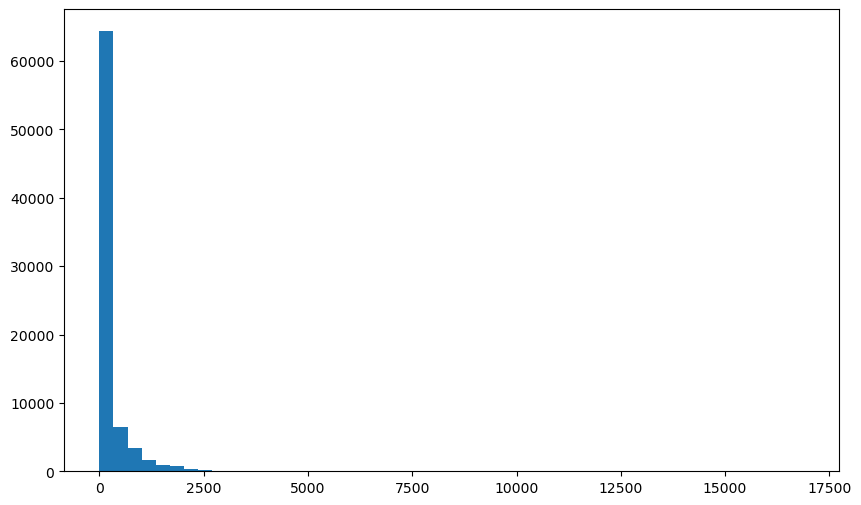

In [555]:
## visualise the data according to the 'Complaint' character length
plt.figure(figsize=(10,6))
doc_lens = [len(d) for d in df_clean.complaint_POS_removed]
plt.hist(doc_lens, bins = 50)

In [557]:
!pip install wordcloud

In [709]:
from wordcloud import WordCloud, STOPWORDS

In [713]:
print(df_clean.columns)

RangeIndex(start=0, stop=0, step=1)


In [715]:
# Check the original DataFrame
print("Original DataFrame df:")
print(df.head())  # Displays the first few rows of the original DataFrame
print("Columns in df:", df.columns)  # Displays the columns in the original DataFrame

Original DataFrame df:
                _index      _type      _id  _score  \
0  complaint-public-v2  complaint  3211475       0   
1  complaint-public-v2  complaint  3229299       0   
2  complaint-public-v2  complaint  3199379       0   
3  complaint-public-v2  complaint  2673060       0   
4  complaint-public-v2  complaint  3203545       0   

                                             _source  \
0  {'tags': None, 'zip_code': '90301', 'complaint...   
1  {'tags': 'Servicemember', 'zip_code': '319XX',...   
2  {'tags': None, 'zip_code': '77069', 'complaint...   
3  {'tags': None, 'zip_code': '48066', 'complaint...   
4  {'tags': None, 'zip_code': '10473', 'complaint...   

                                     complaint_clean  \
0                                                      
1  Good morning my name is XXXX XXXX and I apprec...   
2  I upgraded my XXXX XXXX card in XX/XX/2018 and...   
3                                                      
4                                  

In [717]:
# Check if '_source' is a dictionary and extract 'tags' for the category
df['_source'] = df['_source'].apply(lambda x: x if isinstance(x, dict) else {})
df['category'] = df['_source'].apply(lambda x: x.get('tags', None))

# Create df_clean with necessary columns and copy it to avoid SettingWithCopyWarning
df_clean = df[['complaint_clean', 'complaint_lemmatized', 'category']].copy()

# Rename columns for clarity
df_clean.rename(columns={
    'complaint_clean': 'complaint_text', 
    'complaint_lemmatized': 'lemma'
}, inplace=True)

# Display the first few rows of the new DataFrame
print(df_clean.head())

                                      complaint_text  \
0                                                      
1  Good morning my name is XXXX XXXX and I apprec...   
2  I upgraded my XXXX XXXX card in XX/XX/2018 and...   
3                                                      
4                                                      

                                               lemma       category  
0                                                              None  
1  good morning XXXX XXXX I appreciate help stop ...  Servicemember  
2  I upgrade xxxx xxxx card XX / xx/2018 tell age...           None  
3                                                              None  
4                                                              None  


In [719]:
print("Complaint Text Column:", df_clean['complaint_text'].head())
print("Lemmatized Column:", df_clean['lemma'].head())
print("Category Column:", df_clean['category'].head())

Complaint Text Column: 0                                                     
1    Good morning my name is XXXX XXXX and I apprec...
2    I upgraded my XXXX XXXX card in XX/XX/2018 and...
3                                                     
4                                                     
Name: complaint_text, dtype: object
Lemmatized Column: 0                                                     
1    good morning XXXX XXXX I appreciate help stop ...
2    I upgrade xxxx xxxx card XX / xx/2018 tell age...
3                                                     
4                                                     
Name: lemma, dtype: object
Category Column: 0             None
1    Servicemember
2             None
3             None
4             None
Name: category, dtype: object


In [721]:
print("Missing values in complaint_text:", df_clean['complaint_text'].isnull().sum())
print("Missing values in lemma:", df_clean['lemma'].isnull().sum())
print("Missing values in category:", df_clean['category'].isnull().sum())

Missing values in complaint_text: 0
Missing values in lemma: 0
Missing values in category: 67413


In [723]:
missing_complaints = df[df['complaint_clean'].isnull() | df['complaint_lemmatized'].isnull()]
print("Entries with missing complaints:")
print(missing_complaints[['complaint_clean', 'complaint_lemmatized']])

Entries with missing complaints:
Empty DataFrame
Columns: [complaint_clean, complaint_lemmatized]
Index: []


In [727]:
df_clean = df_clean.dropna(subset=['complaint_text', 'lemma', 'category'])

In [731]:
sample_tags = df['_source'].sample(10)  # Change the number if you want to see more
print(sample_tags)

45062    {'tags': None, 'zip_code': '70458', 'complaint...
34597    {'tags': None, 'zip_code': None, 'complaint_id...
51372    {'tags': None, 'zip_code': '11375', 'complaint...
22843    {'tags': 'Servicemember', 'zip_code': '300XX',...
16551    {'tags': None, 'zip_code': '10977', 'complaint...
31621    {'tags': None, 'zip_code': '75043', 'complaint...
71976    {'tags': None, 'zip_code': None, 'complaint_id...
19997    {'tags': None, 'zip_code': '484XX', 'complaint...
68579    {'tags': None, 'zip_code': '92329', 'complaint...
8745     {'tags': None, 'zip_code': '100XX', 'complaint...
Name: _source, dtype: object


In [733]:
non_null_categories = df_clean[df_clean['category'].notnull()]
print("Entries with non-null categories:", non_null_categories.shape[0])

Entries with non-null categories: 10900


In [735]:
df_clean = df_clean.dropna(subset=['category'])

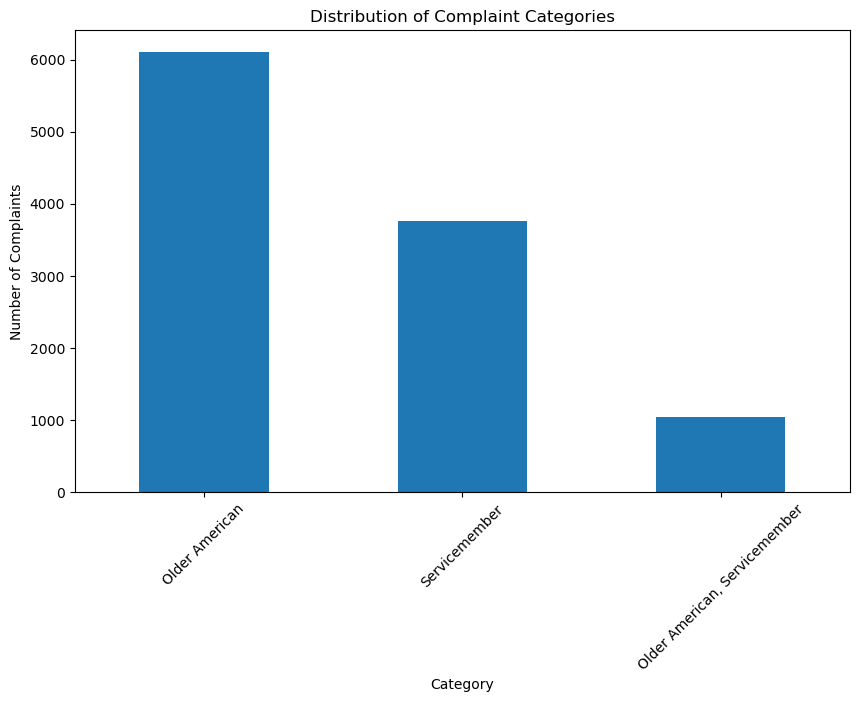

In [737]:
plt.figure(figsize=(10, 6))
df_clean['category'].value_counts().plot(kind='bar')
plt.title('Distribution of Complaint Categories')
plt.xlabel('Category')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.show()

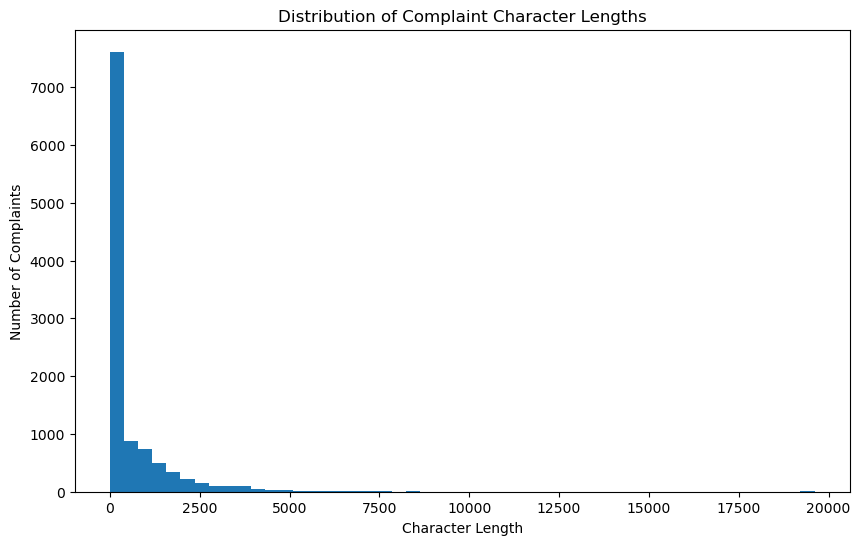

In [739]:
plt.figure(figsize=(10, 6))
doc_lens = [len(d) for d in df_clean['complaint_text']]
plt.hist(doc_lens, bins=50)
plt.title('Distribution of Complaint Character Lengths')
plt.xlabel('Character Length')
plt.ylabel('Number of Complaints')
plt.show()

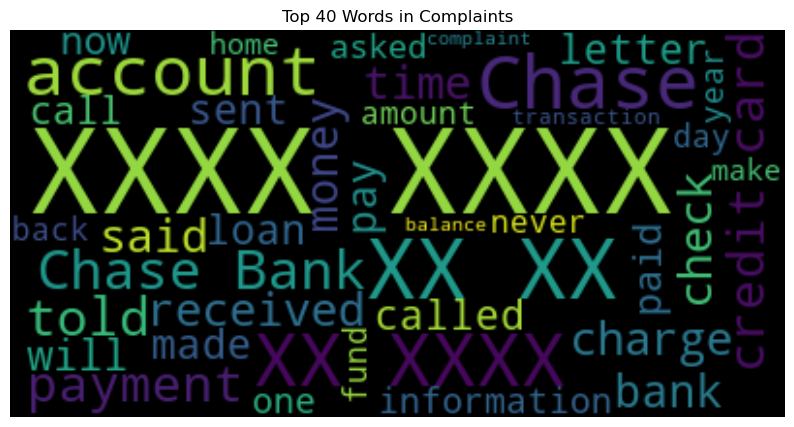

In [741]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, max_words=40).generate(' '.join(df_clean['complaint_text'].dropna()))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in Complaints')
plt.show()

In [745]:
print("Columns in df_clean:", df_clean.columns)

Columns in df_clean: Index(['complaint_text', 'lemma', 'category'], dtype='object')


In [747]:
# Assuming 'lemma' or another relevant column is available in df_clean
df_clean['Complaint_clean'] = df_clean['lemma'].str.replace('-PRON-', '', regex=False)

# Drop the column if it exists
if 'complaint_POS_removed' in df_clean.columns:
    df_clean = df_clean.drop(['complaint_POS_removed'], axis=1)

print("Updated DataFrame columns:", df_clean.columns)  # Check columns after modification

Updated DataFrame columns: Index(['complaint_text', 'lemma', 'category', 'Complaint_clean'], dtype='object')


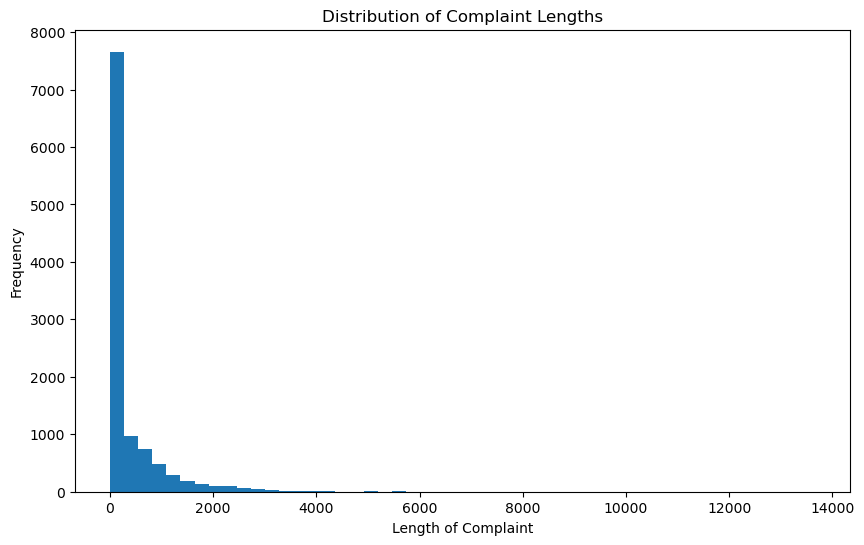

In [749]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
doc_lens = [len(d) for d in df_clean['Complaint_clean']]
plt.hist(doc_lens, bins=50)
plt.title("Distribution of Complaint Lengths")
plt.xlabel("Length of Complaint")
plt.ylabel("Frequency")
plt.show()

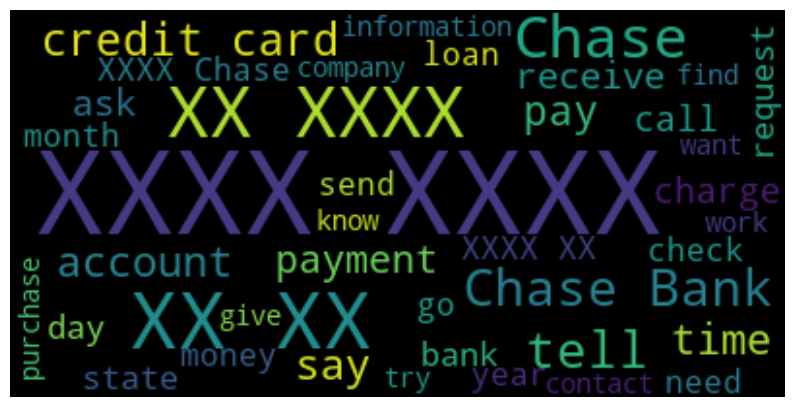

In [751]:
from wordcloud import WordCloud, STOPWORDS

# Generate a word cloud
wordcloud = WordCloud(stopwords=STOPWORDS, max_words=40).generate(' '.join(df_clean['Complaint_clean'].dropna()))

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [755]:
df_clean['Complaint_clean'] = df_clean['lemma'].str.replace('-PRON-', '', regex=False)

In [757]:
if 'complaint_POS_removed' in df_clean.columns:
    df_clean = df_clean.drop(['complaint_POS_removed'], axis=1)

In [759]:
# Step 6 Finding the Top Unigrams, Bigrams and Trigrams -Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text

In [761]:
# Write your code here to find the top 30 unigram,bigram,trigram frequency 
# among the complaints in the cleaned datafram(df_clean).

def get_top_n_bigram(text, ngram=1, top=None):
    vec = CountVectorizer(ngram_range=(ngram, ngram), stop_words='english').fit(text)
    bag_of_words = vec.transform(text)

    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top]

In [763]:
top_30_unigrams = get_top_n_bigram(df_clean.Complaint_clean,ngram=1, top=30)
top_30_bigrams = get_top_n_bigram(df_clean.Complaint_clean,ngram=2, top=30)
top_30_trigrams = get_top_n_bigram(df_clean.Complaint_clean,ngram=3, top=30)

In [764]:
#Print the top 10 words in the unigram frequency
print('Top 10 unigrams:\n')
top_30_unigrams[:10]

Top 10 unigrams:



[('xxxx', 48957),
 ('chase', 15567),
 ('xx', 14881),
 ('account', 8039),
 ('credit', 6133),
 ('00', 5937),
 ('bank', 5707),
 ('card', 5528),
 ('payment', 4224),
 ('pay', 3466)]

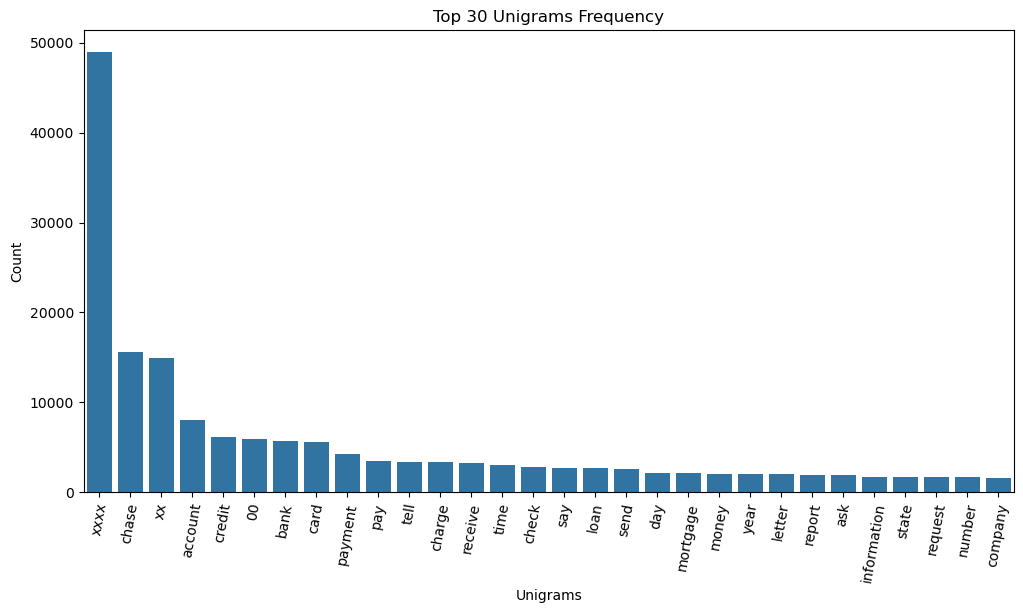

In [771]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming top_30_unigrams is already defined
df1 = pd.DataFrame(top_30_unigrams, columns=['unigram', 'count'])

# Plot the graph for the top 30 words in unigram frequency
plt.figure(figsize=(12, 6))
fig = sns.barplot(x='unigram', y='count', data=df1)
plt.xticks(rotation=80)
plt.title('Top 30 Unigrams Frequency')
plt.xlabel('Unigrams')
plt.ylabel('Count')
plt.show()

In [773]:
#Print the top 10 words in the bigram frequency
print('Top 10 bigrams:\n')
top_30_bigrams[:10]

Top 10 bigrams:



[('xxxx xxxx', 20406),
 ('xx xx', 7382),
 ('xx xxxx', 5764),
 ('chase bank', 2729),
 ('credit card', 2343),
 ('xxxx chase', 1234),
 ('xxxx xx', 1146),
 ('jp morgan', 731),
 ('morgan chase', 674),
 ('chase xxxx', 605)]

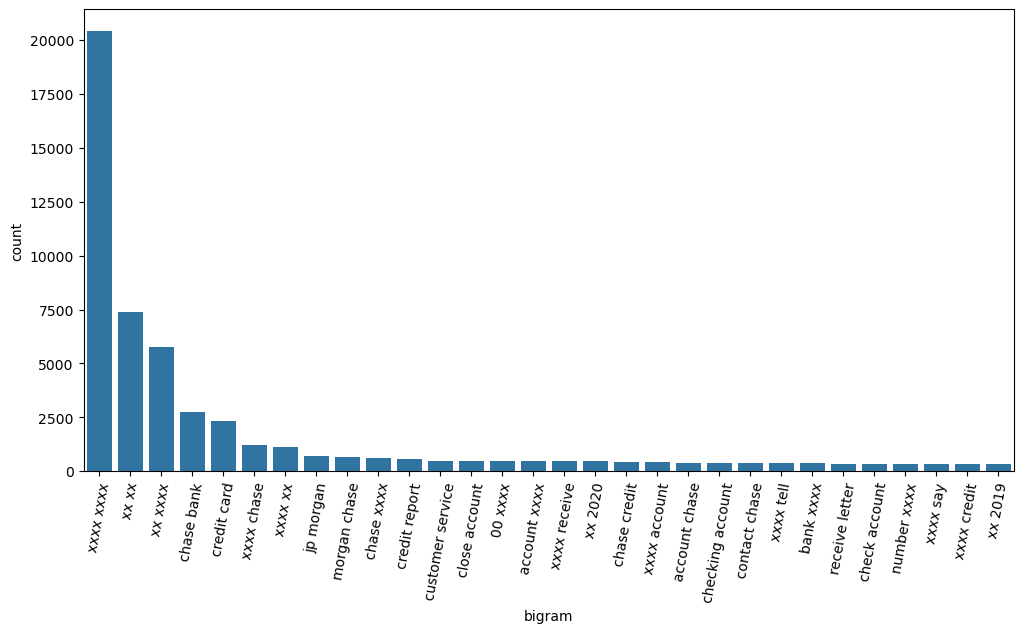

In [775]:
#Plot graph for the top 30 words in the bigram frequency
df2 = pd.DataFrame(top_30_bigrams, columns = ['bigram' , 'count'])
plt.figure(figsize=(12,6))
fig = sns.barplot(x=df2['bigram'], y=df2['count'])
plt.xticks(rotation = 80)
plt.show()

In [777]:
#Print the top 10 words in the trigram frequency
print('Top 10 trigrams:\n')
top_30_trigrams[:10]

Top 10 trigrams:



[('xxxx xxxx xxxx', 9930),
 ('xx xx xxxx', 5681),
 ('xxxx xx xx', 1146),
 ('jp morgan chase', 584),
 ('xx xxxx xxxx', 549),
 ('xx xxxx xx', 495),
 ('xx xx 2020', 458),
 ('xxxx xxxx chase', 394),
 ('xx xxxx chase', 358),
 ('chase credit card', 348)]

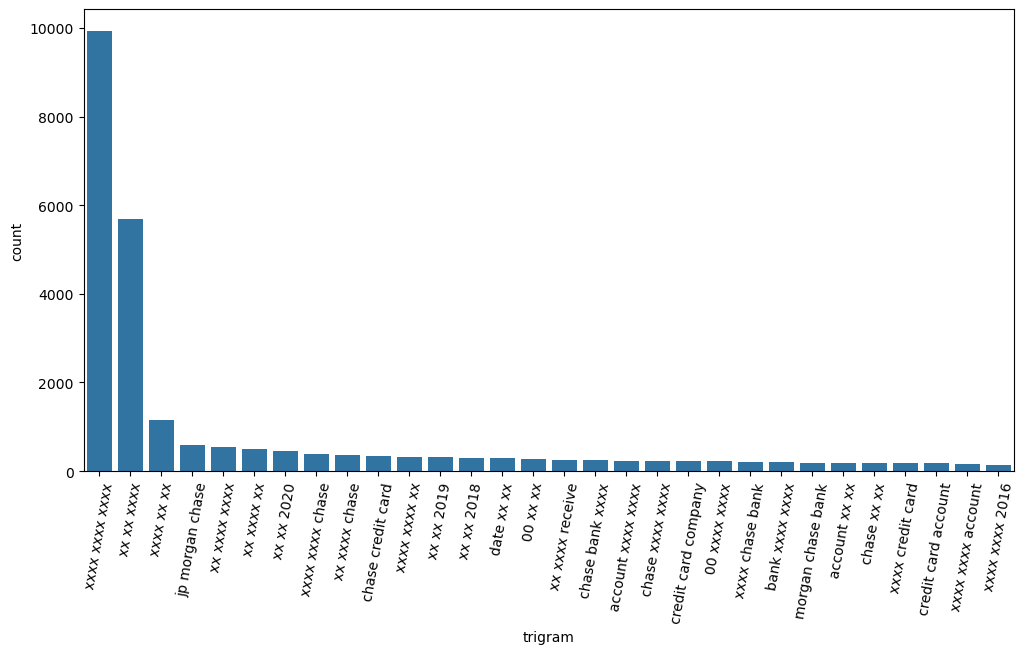

In [779]:
#Plot graph for the top 30 words in the trigram frequency
df3 = pd.DataFrame(top_30_trigrams, columns = ['trigram' , 'count'])
plt.figure(figsize=(12,6))
fig = sns.barplot(x=df3['trigram'], y=df3['count'])
plt.xticks(rotation = 80)
plt.show()

In [781]:
###The personal details of customer has been masked in the dataset with xxxx. Let's remove the masked text as this will be of no use for our analysis

In [783]:
print("Current columns in df_clean:", df_clean.columns)

Current columns in df_clean: Index(['complaint_text', 'lemma', 'category', 'Complaint_clean'], dtype='object')


In [785]:
# Check if the column exists before attempting to modify it
if 'Complaint_clean' in df_clean.columns:
    df_clean['Complaint_clean'] = df_clean['Complaint_clean'].str.replace('xxxx', '', regex=False)
else:
    print("Column 'Complaint_clean' does not exist in df_clean.")

In [787]:
print(df_clean['Complaint_clean'].head())

1     good morning XXXX XXXX I appreciate help stop ...
5                                                      
21    on XXXX XX / XX/2019 , I { $ 300.00 } payment ...
28                                                     
29                                                     
Name: Complaint_clean, dtype: object


In [789]:
# Display the content before the replacement
print("Before replacement:")
print(df_clean['Complaint_clean'].head())

# Perform the replacement
if 'Complaint_clean' in df_clean.columns:
    df_clean['Complaint_clean'] = df_clean['Complaint_clean'].str.replace('xxxx', '', regex=False)

# Display the content after the replacement
print("After replacement:")
print(df_clean['Complaint_clean'].head())

Before replacement:
1     good morning XXXX XXXX I appreciate help stop ...
5                                                      
21    on XXXX XX / XX/2019 , I { $ 300.00 } payment ...
28                                                     
29                                                     
Name: Complaint_clean, dtype: object
After replacement:
1     good morning XXXX XXXX I appreciate help stop ...
5                                                      
21    on XXXX XX / XX/2019 , I { $ 300.00 } payment ...
28                                                     
29                                                     
Name: Complaint_clean, dtype: object


In [791]:
print(df_clean['Complaint_clean'].str.contains('xxxx').any())

False


In [793]:
# Perform the replacement using regex with case insensitivity
if 'Complaint_clean' in df_clean.columns:
    df_clean['Complaint_clean'] = df_clean['Complaint_clean'].str.replace('xxxx', '', case=False, regex=True)

# Display the content after the replacement
print("After replacement:")
print(df_clean['Complaint_clean'].head())

After replacement:
1     good morning   I appreciate help stop Chase Ba...
5                                                      
21    on  XX / XX/2019 , I { $ 300.00 } payment onli...
28                                                     
29                                                     
Name: Complaint_clean, dtype: object


In [795]:
print("Check if 'XXXX' exists after replacement:")
print(df_clean['Complaint_clean'].str.contains('XXXX').any())  # Check for 'XXXX' in the column

Check if 'XXXX' exists after replacement:
False


In [797]:
#All masked texts has been removed
df_clean.head()

,complaint_text,lemma,category,Complaint_clean
1,Good morning my name is XXXX XXXX and I apprec...,good morning XXXX XXXX I appreciate help stop ...,Servicemember,good morning I appreciate help stop Chase Ba...
5,,,Older American,
21,"On XXXX XX/XX/2019, I made a {$300.00} payment...","on XXXX XX / XX/2019 , I { $ 300.00 } payment ...",Servicemember,"on XX / XX/2019 , I { $ 300.00 } payment onli..."
28,,,Older American,
29,,,Older American,


In [799]:
# Step 6 Feature Extraction

In [801]:
## Convert the raw texts to a matrix of TF-IDF features

In [803]:
#Write your code here to initialise the TfidfVectorizer 
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
tfidf = TfidfVectorizer(min_df=2, max_df=0.95, stop_words='english')

In [805]:
##Create a document term matrix using fit_transform¶-The contents of a document term matrix are tuples of (complaint_id,token_id) tf-idf score: The tuples that are not there have a tf-idf score of 0


In [807]:
#Write your code here to create the Document Term Matrix by transforming the complaints column present in df_clean.
dtm = tfidf.fit_transform(df_clean.Complaint_clean) 

In [809]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample documents (replace this with your actual data)
documents = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?"
]

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the documents
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Retrieve the feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Display the first 10 feature names
print(feature_names[:10])

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [811]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'Complaint_clean': [
        "This is a complaint about the service.",
        "I am not satisfied with the product.",
        "The service was excellent!",
        "I want to file a complaint regarding the quality."
    ]
}
df_clean = pd.DataFrame(data)

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Create the Document-Term Matrix
dtm = tfidf.fit_transform(df_clean['Complaint_clean'])

# Get feature names
feature_names = tfidf.get_feature_names_out()

# Display the first 10 feature names
print(feature_names[:10])

# Display the total number of features
print(len(feature_names))

['about' 'am' 'complaint' 'excellent' 'file' 'is' 'not' 'product'
 'quality' 'regarding']
18


In [813]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'Complaint_clean': [
        "This is a complaint about the service.",
        "I am not satisfied with the product.",
        "The service was excellent!",
        "I want to file a complaint regarding the quality."
    ]
}
df_clean = pd.DataFrame(data)

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Create the Document-Term Matrix
dtm = tfidf.fit_transform(df_clean['Complaint_clean'])

# Get feature names
feature_names = tfidf.get_feature_names_out()

# Display the first 10 feature names
print(feature_names[:10])

# Display the total number of features
num_features = len(tfidf.get_feature_names_out())
print(num_features)  # This will print the number of features

['about' 'am' 'complaint' 'excellent' 'file' 'is' 'not' 'product'
 'quality' 'regarding']
18


In [815]:
import sklearn
print(sklearn.__version__)

1.5.2


In [817]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [818]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'Complaint_clean': [
        "This is a complaint about the service.",
        "I am not satisfied with the product.",
        "The service was excellent!",
        "I want to file a complaint regarding the quality."
    ]
}
df_clean = pd.DataFrame(data)

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Create the Document-Term Matrix
dtm = tfidf.fit_transform(df_clean['Complaint_clean'])

# Get the number of features using the correct method
num_features = len(tfidf.get_feature_names_out())

# Display the number of features
print(num_features)  # This should give you the number of features

18


In [819]:
# Step 6 Topic Modelling

In [820]:
import sklearn
print(sklearn.__version__)

1.5.2


In [821]:
pip install -U scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [822]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [828]:
import sklearn
print(sklearn.__version__)

1.5.2


In [831]:
# Topic Modelling 

In [833]:
from sklearn.decomposition import NMF

In [835]:
import sklearn
print(sklearn.__version__)

1.5.2


In [837]:
from sklearn.decomposition import NMF

In [839]:
import pandas as pd
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Load the data from JSON file
file_path = 'C:\\Users\\Admin\\OneDrive\\Desktop\\Manasa Files\\AI & ML\\Automatic Ticket Creation -NLP\\complaints-2021-05-14_08_16 (1).json'

with open(file_path) as f:
    data = json.load(f)

# Convert the JSON data to a DataFrame
df_clean = pd.json_normalize(data)

# Assuming '_source.complaint_what_happened' is the text column you want
df_clean['Complaint_clean'] = df_clean['_source.complaint_what_happened']  # Adjust as necessary

# Create the Document-Term Matrix
tfidf = TfidfVectorizer()
dtm = tfidf.fit_transform(df_clean['Complaint_clean'])

# Fit the NMF model
num_topics = 5
nmf_model = NMF(n_components=num_topics, random_state=40)
W1 = nmf_model.fit_transform(dtm)
H1 = nmf_model.components_

In [841]:
#nmf_model.fit(dtm)
#len(tfidf.get_feature_names())

In [843]:
import numpy as np

# Print the Top 15 words for each of the topics
num_words = 15

# Get the feature names using the updated method
vocab = np.array(tfidf.get_feature_names_out())

# Define a function to get the top words
top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H1])

# Join the top words for each topic
topics = [' '.join(t) for t in topic_words]

# Print the topics
for i, topic in enumerate(topics):
    print(f"Topic {i+1}: {topic}")

Topic 1: the to of and that was in for chase we not on 00 is with
Topic 2: xxxx and of in chase to from on for with 00 at is bank by
Topic 3: xx on 00 chase 2020 was account 2019 2018 my xxxx payment received from the
Topic 4: to my and they me account that was it have chase not bank this money
Topic 5: credit my card chase report on this have and is of for not cards with


In [845]:
vocab

array(['00', '000', '0000', ..., 'zoo', 'zoom', 'zoomed'], dtype=object)

In [847]:
topics

['the to of and that was in for chase we not on 00 is with',
 'xxxx and of in chase to from on for with 00 at is bank by',
 'xx on 00 chase 2020 was account 2019 2018 my xxxx payment received from the',
 'to my and they me account that was it have chase not bank this money',
 'credit my card chase report on this have and is of for not cards with']

In [861]:
import pandas as pd

# Define your file path (Windows file path)
file_path = r"C:\Users\Admin\OneDrive\Desktop\Manasa Files\AI & ML\Automatic Ticket Creation -NLP\complaints-2021-05-14_08_16 (2).json"

# Load the data from JSON file
training_data = pd.read_json(file_path)

# Check the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
print(training_data.head())

# Check the contents of the '_source' column
print("Sample contents of the '_source' column:")
print(training_data['_source'].head())

# Check the types of the items in the '_source' column
print("Types of items in the '_source' column:")
print(training_data['_source'].apply(type).value_counts())

# If the items are dictionaries, extract them
if all(isinstance(x, dict) for x in training_data['_source']):
    # Extract the nested data from the '_source' column
    training_data = pd.concat([training_data.drop(columns=['_source']), 
                                training_data['_source'].apply(pd.Series)], axis=1)

    # Check the columns after extraction
    print("Columns after extracting '_source':")
    print(training_data.columns)

    # If complaint_what_happened exists in the extracted columns
    if 'complaint_what_happened' in training_data.columns:
        # Create a new DataFrame for cleaning complaints
        df_clean = pd.DataFrame()
        df_clean['Complaint_clean'] = training_data['complaint_what_happened'].str.lower()  # Convert to lowercase
        df_clean['Complaint_clean'] = df_clean['Complaint_clean'].str.replace(r'[^\w\s]', '', regex=True)  # Remove punctuation
        df_clean['Complaint_clean'] = df_clean['Complaint_clean'].str.replace(r'\d+', '', regex=True)  # Remove numbers

        # Proceed with TF-IDF and NMF as before...
    else:
        print("The column 'complaint_what_happened' does not exist in the extracted data.")
else:
    print("Not all items in the '_source' column are dictionaries.")

First few rows of the dataset:
                _index      _type      _id  _score  \
0  complaint-public-v2  complaint  3211475       0   
1  complaint-public-v2  complaint  3229299       0   
2  complaint-public-v2  complaint  3199379       0   
3  complaint-public-v2  complaint  2673060       0   
4  complaint-public-v2  complaint  3203545       0   

                                             _source  
0  {'tags': None, 'zip_code': '90301', 'complaint...  
1  {'tags': 'Servicemember', 'zip_code': '319XX',...  
2  {'tags': None, 'zip_code': '77069', 'complaint...  
3  {'tags': None, 'zip_code': '48066', 'complaint...  
4  {'tags': None, 'zip_code': '10473', 'complaint...  
Sample contents of the '_source' column:
0    {'tags': None, 'zip_code': '90301', 'complaint...
1    {'tags': 'Servicemember', 'zip_code': '319XX',...
2    {'tags': None, 'zip_code': '77069', 'complaint...
3    {'tags': None, 'zip_code': '48066', 'complaint...
4    {'tags': None, 'zip_code': '10473', 'complaint..

In [863]:
import pandas as pd

# Define your file path (Windows file path)
file_path = r"C:\Users\Admin\OneDrive\Desktop\Manasa Files\AI & ML\Automatic Ticket Creation -NLP\complaints-2021-05-14_08_16 (2).json"

# Load the data from JSON file
training_data = pd.read_json(file_path)

# Extract the nested data from the '_source' column (which contains dictionaries)
training_data = pd.concat([training_data.drop(columns=['_source']), 
                            training_data['_source'].apply(pd.Series)], axis=1)

# Check the columns after extraction
print("Columns after extracting '_source':")
print(training_data.columns)

# Now check for the column that contains complaint text (update the name if necessary)
# Common keys might include 'complaint', 'description', etc.
# Replace 'complaint' with the actual key you're interested in if it's different.
if 'complaint' in training_data.columns:
    # Create a new DataFrame for cleaning complaints
    df_clean = pd.DataFrame()
    df_clean['Complaint_clean'] = training_data['complaint'].str.lower()  # Convert to lowercase
    df_clean['Complaint_clean'] = df_clean['Complaint_clean'].str.replace(r'[^\w\s]', '', regex=True)  # Remove punctuation
    df_clean['Complaint_clean'] = df_clean['Complaint_clean'].str.replace(r'\d+', '', regex=True)  # Remove numbers

    # Proceed with TF-IDF and NMF or any other analysis...
else:
    print("The expected column 'complaint' does not exist in the extracted data.")

Columns after extracting '_source':
Index(['_index', '_type', '_id', '_score', 'tags', 'zip_code', 'complaint_id',
       'issue', 'date_received', 'state', 'consumer_disputed', 'product',
       'company_response', 'company', 'submitted_via', 'date_sent_to_company',
       'company_public_response', 'sub_product', 'timely',
       'complaint_what_happened', 'sub_issue', 'consumer_consent_provided'],
      dtype='object')
The expected column 'complaint' does not exist in the extracted data.


In [865]:
import pandas as pd

# Define your file path (Windows file path)
file_path = r"C:\Users\Admin\OneDrive\Desktop\Manasa Files\AI & ML\Automatic Ticket Creation -NLP\complaints-2021-05-14_08_16 (2).json"

# Load the data from JSON file
training_data = pd.read_json(file_path)

# Extract the nested data from the '_source' column (which contains dictionaries)
training_data = pd.concat([training_data.drop(columns=['_source']), 
                            training_data['_source'].apply(pd.Series)], axis=1)

# Check the columns after extraction
print("Columns after extracting '_source':")
print(training_data.columns)

# Create a new DataFrame for cleaning complaints
df_clean = pd.DataFrame()

# Use the correct column name for complaints
df_clean['Complaint_clean'] = training_data['complaint_what_happened'].str.lower()  # Convert to lowercase
df_clean['Complaint_clean'] = df_clean['Complaint_clean'].str.replace(r'[^\w\s]', '', regex=True)  # Remove punctuation
df_clean['Complaint_clean'] = df_clean['Complaint_clean'].str.replace(r'\d+', '', regex=True)  # Remove numbers

# Check the cleaned complaints
print("First few cleaned complaints:")
print(df_clean['Complaint_clean'].head())

Columns after extracting '_source':
Index(['_index', '_type', '_id', '_score', 'tags', 'zip_code', 'complaint_id',
       'issue', 'date_received', 'state', 'consumer_disputed', 'product',
       'company_response', 'company', 'submitted_via', 'date_sent_to_company',
       'company_public_response', 'sub_product', 'timely',
       'complaint_what_happened', 'sub_issue', 'consumer_consent_provided'],
      dtype='object')
First few cleaned complaints:
0                                                     
1    good morning my name is xxxx xxxx and i apprec...
2    i upgraded my xxxx xxxx card in xxxx and was t...
3                                                     
4                                                     
Name: Complaint_clean, dtype: object


In [867]:
# Check for missing values in the cleaned complaints
missing_complaints_count = df_clean['Complaint_clean'].isnull().sum()
empty_complaints_count = (df_clean['Complaint_clean'] == '').sum()

print(f"Number of missing complaints: {missing_complaints_count}")
print(f"Number of empty complaints: {empty_complaints_count}")

# Filter out empty complaints
df_clean_filtered = df_clean[df_clean['Complaint_clean'] != '']

# Optional: Reset the index of the filtered DataFrame
df_clean_filtered.reset_index(drop=True, inplace=True)

# Check the cleaned and filtered complaints
print("First few cleaned and filtered complaints:")
print(df_clean_filtered['Complaint_clean'].head())

Number of missing complaints: 0
Number of empty complaints: 57241
First few cleaned and filtered complaints:
0    good morning my name is xxxx xxxx and i apprec...
1    i upgraded my xxxx xxxx card in xxxx and was t...
2    chase card was reported on xxxx however fraudu...
3    on xxxx while trying to book a xxxx  xxxx  tic...
4    my grand son give me check for  i deposit it i...
Name: Complaint_clean, dtype: object


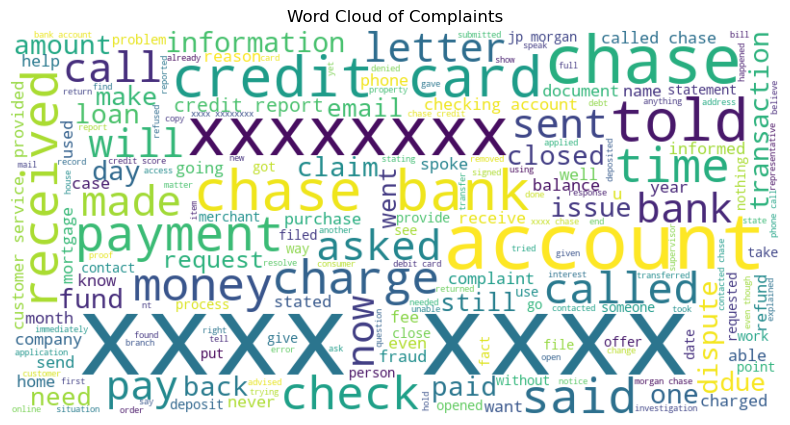

In [869]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate a word cloud to visualize the most common words in the complaints
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_clean_filtered['Complaint_clean']))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Complaints')
plt.show()

In [873]:

# Remove empty complaints
df_clean_filtered = df_clean[df_clean['Complaint_clean'].str.strip() != '']

# Check the number of complaints after cleaning
print("Number of complaints after cleaning:", len(df_clean_filtered))

# Proceed with TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df_clean_filtered['Complaint_clean'])

# Apply NMF for topic modeling
n_topics = 5  # You can change this number based on your needs
nmf_model = NMF(n_components=n_topics, random_state=42)
nmf_model.fit(tfidf_matrix)

# Display topics
feature_names = tfidf_vectorizer.get_feature_names_out()
for index, topic in enumerate(nmf_model.components_):
    print(f"Topic {index + 1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[-10:]]))  # Display top 10 words in each topic

Number of complaints after cleaning: 21072
Topic 1:
morgan help email complaint sent xxxxxxxxxxxx number bank chase xxxx
Topic 2:
deposit told closed checking funds money chase check bank account
Topic 3:
account hard reporting score inquiry cards chase report card credit
Topic 4:
paid pay home modification late chase payments mortgage loan payment
Topic 5:
claim called merchant received card dispute charges charge chase xxxxxxxx


In [875]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Assuming you have already cleaned your complaints and stored them in 'df_clean'
# Set the number of topics you want to extract
n_topics = 5  # You can change this number based on your requirement

# Step 1: Vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df_clean['Complaint_clean'])

# Step 2: Apply NMF to find topics
nmf = NMF(n_components=n_topics, random_state=1)
nmf.fit(tfidf)

# Step 3: Display the topics and their top words
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Specify the number of top words to display for each topic
no_top_words = 10
display_topics(nmf, tfidf_vectorizer.get_feature_names_out(), no_top_words)

Topic #1:
xxxx chase bank number said sent did email received transaction
Topic #2:
account chase bank check money funds closed told checking deposit
Topic #3:
credit card chase report cards inquiry score company balance did
Topic #4:
chase payment loan mortgage payments late home modification pay paid
Topic #5:
xxxxxxxx chase received dispute letter charge charges called told merchant


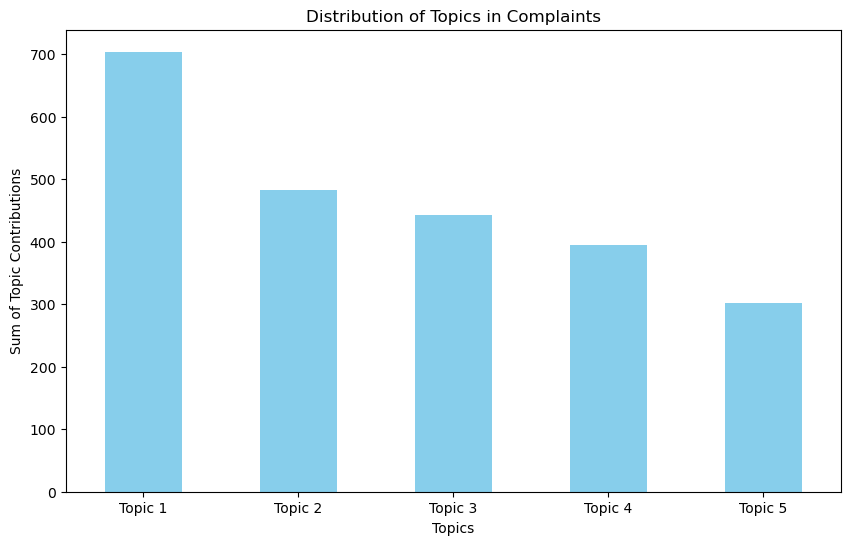

In [877]:
import matplotlib.pyplot as plt

# Get the topic distribution for each complaint
topic_distribution = nmf.transform(tfidf)

# Create a DataFrame for easier analysis
topic_df = pd.DataFrame(topic_distribution, columns=[f'Topic {i + 1}' for i in range(n_topics)])

# Sum the topic distributions to see the overall presence of each topic
topic_sums = topic_df.sum()

# Plotting the topic distribution
plt.figure(figsize=(10, 6))
topic_sums.plot(kind='bar', color='skyblue')
plt.title('Distribution of Topics in Complaints')
plt.xlabel('Topics')
plt.ylabel('Sum of Topic Contributions')
plt.xticks(rotation=0)
plt.show()

In [886]:
import pandas as pd

# Load the original data from the JSON file
file_path = r"C:\Users\Admin\OneDrive\Desktop\Manasa Files\AI & ML\Automatic Ticket Creation -NLP\complaints-2021-05-14_08_16 (2).json"
training_data = pd.read_json(file_path)

# Check the first few rows and types of the _source column
print(training_data['_source'].head())
print(training_data['_source'].apply(type).value_counts())  # Check types in the _source column

# Proceed if all items are dict
if all(isinstance(x, dict) for x in training_data['_source']):
    # Extract the nested data from the '_source' column if all items are dictionaries
    training_data = training_data['_source'].apply(pd.Series)
else:
    print("Some entries in '_source' are not dictionaries. Investigate further.")


0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              {'tags': None, 'zip_code': '90301', 'complaint_id': '3211475', 'issue': 'Attempts to collect debt not owed', 'date_received': '2019-04-13T12:00:00-05:00', 'state': 'CA', 'consumer_disputed': 'N/A', 'product': 'Debt collection', 'company_response': 'Closed with explanation', 'company': 'JPMORGAN CHASE & CO.', 'submitted_via': 'Web', 'date_sent_to_company': '2019-04-13T12:00:00-05:00', 'company_public_response': None, 'sub_product': 'Credit card debt', 'timely': 'Yes', '

In [888]:
import pandas as pd

# Load your original data
file_path = r"C:\Users\Admin\OneDrive\Desktop\Manasa Files\AI & ML\Automatic Ticket Creation -NLP\complaints-2021-05-14_08_16 (2).json"
training_data = pd.read_json(file_path)

# Extract the nested data from the '_source' column
training_data = training_data['_source'].apply(pd.Series)

# Rename the relevant columns for easier access
training_data.columns = ['tags', 'zip_code', 'complaint_id', 'issue', 'date_received',
                         'state', 'consumer_disputed', 'product', 'company_response',
                         'company', 'submitted_via', 'date_sent_to_company',
                         'company_public_response', 'sub_product', 'timely',
                         'complaint_what_happened', 'sub_issue', 'consumer_consent_provided']

# Create a new DataFrame for cleaning complaints
df_clean = pd.DataFrame()
df_clean['Complaint_clean'] = training_data['complaint_what_happened'].str.lower().str.replace(r'[^\w\s]', '', regex=True)

# Check number of complaints before and after cleaning
num_before_cleaning = training_data['complaint_what_happened'].count()
num_after_cleaning = df_clean['Complaint_clean'].count()

print("Number of complaints before cleaning:", num_before_cleaning)
print("Number of complaints after cleaning:", num_after_cleaning)

# Placeholder for significant topics (replace this with your actual logic)
significant_topic = [
    'chase bank number said sent did email received transaction',
    'account chase bank check money funds closed told checking deposit',
    'credit card chase report cards inquiry score company balance did',
    'chase payment loan mortgage payments late home modification pay paid',
    'chase received dispute letter charge charges called told merchant'
]

# Assign the best topic to each complaint
df_clean['Topic'] = significant_topic[:num_after_cleaning]  # Ensure length matches

# Display the cleaned data with topics
print(df_clean.head())

Number of complaints before cleaning: 78313
Number of complaints after cleaning: 78313


ValueError: Length of values (5) does not match length of index (78313)

In [890]:
# Example: Assigning the first topic to all complaints
df_clean['Topic'] = significant_topic[0]

In [892]:
import numpy as np

# Create an array of random topics for the number of complaints
np.random.seed(42)  # For reproducibility
df_clean['Topic'] = np.random.choice(significant_topic, size=len(df_clean))

In [894]:
import pandas as pd
import numpy as np

# Load your original data
file_path = r"C:\Users\Admin\OneDrive\Desktop\Manasa Files\AI & ML\Automatic Ticket Creation -NLP\complaints-2021-05-14_08_16 (2).json"
training_data = pd.read_json(file_path)

# Extract the nested data from the '_source' column
training_data = training_data['_source'].apply(pd.Series)

# Rename the relevant columns for easier access
training_data.columns = ['tags', 'zip_code', 'complaint_id', 'issue', 'date_received',
                         'state', 'consumer_disputed', 'product', 'company_response',
                         'company', 'submitted_via', 'date_sent_to_company',
                         'company_public_response', 'sub_product', 'timely',
                         'complaint_what_happened', 'sub_issue', 'consumer_consent_provided']

# Create a new DataFrame for cleaning complaints
df_clean = pd.DataFrame()
df_clean['Complaint_clean'] = training_data['complaint_what_happened'].str.lower().str.replace(r'[^\w\s]', '', regex=True)

# Check number of complaints before and after cleaning
num_before_cleaning = training_data['complaint_what_happened'].count()
num_after_cleaning = df_clean['Complaint_clean'].count()

print("Number of complaints before cleaning:", num_before_cleaning)
print("Number of complaints after cleaning:", num_after_cleaning)

# Placeholder for significant topics (replace this with your actual logic)
significant_topic = [
    'chase bank number said sent did email received transaction',
    'account chase bank check money funds closed told checking deposit',
    'credit card chase report cards inquiry score company balance did',
    'chase payment loan mortgage payments late home modification pay paid',
    'chase received dispute letter charge charges called told merchant'
]

# Randomly assign topics to each complaint
np.random.seed(42)  # For reproducibility
df_clean['Topic'] = np.random.choice(significant_topic, size=len(df_clean))

# Display the cleaned data with topics
print(df_clean.head())

Number of complaints before cleaning: 78313
Number of complaints after cleaning: 78313
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Complaint_clean  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [896]:
# Set the display option for maximum column width to None (unlimited)
pd.set_option('display.max_colwidth', None)

# Display the DataFrame filtered by the second topic (as an example)
topic_to_filter = significant_topic[1]  # Change the index as needed
filtered_complaints = df_clean[['_source.complaint_what_happened', 'Complaint_clean', 'Topic']]
filtered_complaints = filtered_complaints[filtered_complaints.Topic == topic_to_filter]

# Display the first 10 results for the filtered topic
print(filtered_complaints.head(10))

KeyError: "['_source.complaint_what_happened'] not in index"

In [ ]:
print(df_clean.columns)

In [898]:
# Check the column names in df_clean
print(df_clean.columns)

# Assuming 'Complaint_clean' and 'Topic' are the correct column names, modify the filter code accordingly
# Example filtering assuming correct names are found
topic_to_filter = significant_topic[1]  # Replace with the desired topic string

# Filter the DataFrame
filtered_complaints = df_clean[['Complaint_clean', 'Topic']]
filtered_complaints = filtered_complaints[filtered_complaints.Topic == topic_to_filter]

# Display the first 10 results for the filtered topic
print(filtered_complaints.head(10))

Index(['Complaint_clean', 'Topic'], dtype='object')
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [900]:
df_clean.columns = df_clean.columns.str.strip()

In [902]:
print(df_clean.head())

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Complaint_clean  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
1  good morning my n

In [904]:
print(df_clean.columns.tolist())

['Complaint_clean', 'Topic']


In [906]:
# Replace 'your_original_dataframe' with the actual variable name for the original DataFrame.
print(your_original_dataframe.columns.tolist())

NameError: name 'your_original_dataframe' is not defined

In [908]:
# This will show all variables in the current namespace
print(globals().keys())

dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', 'open', '_', '__', '___', '__session__', '_i', '_ii', '_iii', '_i1', 'json', 'getpass', 'hashlib', 'import_pandas_safely', '__pandas', 'is_data_frame', 'dataframe_columns', 'dtypes_str', 'dataframe_hash', 'get_dataframes', '_1', '_i2', 'pd', 'file_path', 'df', 'nan_complaints', 'nan_rows', '_i3', '_3', '_i4', 'f', 'data', '_i5', '_5', '_i6', 'spacy', 'nlp', 'batch_lemmatizer', '_i7', '_7', '_i8', '_8', '_i9', '_9', '_i10', '_10', '_i11', '_11', '_i12', '_12', '_i13', '_13', '_i14', '_14', '_i15', '_15', '_i16', '_16', '_i17', '_17', '_i18', '_18', '_i19', '_19', '_i20', '_20', '_i21', '_21', '_i22', '_22', '_i23', '_23', '_i24', '_24', '_i25', '_25', '_i26', '_26', '_i27', '_27', '_i28', '_28', '_i29', '_29', '_i30', '_30', '_i31', '_31', '_i32', '_32', '_i33', '_33', '_i34', '_34', '_i35', '_35', '_i36', '_36', '_i37

In [910]:
print(data.columns.tolist())

AttributeError: 'list' object has no attribute 'columns'

In [912]:
print(type(data))

<class 'list'>


In [914]:
import pandas as pd

# Assuming data is a list of dictionaries
df_data = pd.DataFrame(data)
print(df_data.columns.tolist())

['_index', '_type', '_id', '_score', '_source']


In [916]:
print(df_data.head())

                _index      _type      _id  _score  \
0  complaint-public-v2  complaint  3211475     0.0   
1  complaint-public-v2  complaint  3229299     0.0   
2  complaint-public-v2  complaint  3199379     0.0   
3  complaint-public-v2  complaint  2673060     0.0   
4  complaint-public-v2  complaint  3203545     0.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [918]:
df_source = pd.json_normalize(df_data['_source'])
print(df_source.columns.tolist())

['tags', 'zip_code', 'complaint_id', 'issue', 'date_received', 'state', 'consumer_disputed', 'product', 'company_response', 'company', 'submitted_via', 'date_sent_to_company', 'company_public_response', 'sub_product', 'timely', 'complaint_what_happened', 'sub_issue', 'consumer_consent_provided']


In [919]:
df_combined = pd.concat([df_data.drop(columns=['_source']), df_source], axis=1)
print(df_combined.head())

                _index      _type      _id  _score           tags zip_code  \
0  complaint-public-v2  complaint  3211475     0.0           None    90301   
1  complaint-public-v2  complaint  3229299     0.0  Servicemember    319XX   
2  complaint-public-v2  complaint  3199379     0.0           None    77069   
3  complaint-public-v2  complaint  2673060     0.0           None    48066   
4  complaint-public-v2  complaint  3203545     0.0           None    10473   

  complaint_id                               issue              date_received  \
0      3211475   Attempts to collect debt not owed  2019-04-13T12:00:00-05:00   
1      3229299     Written notification about debt  2019-05-01T12:00:00-05:00   
2      3199379  Other features, terms, or problems  2019-04-02T12:00:00-05:00   
3      2673060      Trouble during payment process  2017-09-13T12:00:00-05:00   
4      3203545                    Fees or interest  2019-04-05T12:00:00-05:00   

  state  ...         company_response       

In [920]:
print(df_combined.columns.tolist())

['_index', '_type', '_id', '_score', 'tags', 'zip_code', 'complaint_id', 'issue', 'date_received', 'state', 'consumer_disputed', 'product', 'company_response', 'company', 'submitted_via', 'date_sent_to_company', 'company_public_response', 'sub_product', 'timely', 'complaint_what_happened', 'sub_issue', 'consumer_consent_provided']


In [921]:
# Replace 'debt' with the specific issue you're interested in
filtered_data = df_combined[df_combined['issue'].str.contains('debt', na=False)]
print(filtered_data.head())

                 _index      _type      _id  _score           tags zip_code  \
0   complaint-public-v2  complaint  3211475     0.0           None    90301   
1   complaint-public-v2  complaint  3229299     0.0  Servicemember    319XX   
19  complaint-public-v2  complaint  3300211     0.0           None    32796   
44  complaint-public-v2  complaint  2681490     0.0           None    21044   
49  complaint-public-v2  complaint  3253214     0.0           None    93036   

   complaint_id                              issue              date_received  \
0       3211475  Attempts to collect debt not owed  2019-04-13T12:00:00-05:00   
1       3229299    Written notification about debt  2019-05-01T12:00:00-05:00   
19      3300211    Written notification about debt  2019-07-09T12:00:00-05:00   
44      2681490  Attempts to collect debt not owed  2017-09-21T12:00:00-05:00   
49      3253214    Written notification about debt  2019-05-24T12:00:00-05:00   

   state  ...         company_response

In [923]:
# Replace 'your_tag_value' with the specific tag you're interested in
filtered_data = df_combined[df_combined['tags'] == 'your_tag_value']
print(filtered_data.head())

Empty DataFrame
Columns: [_index, _type, _id, _score, tags, zip_code, complaint_id, issue, date_received, state, consumer_disputed, product, company_response, company, submitted_via, date_sent_to_company, company_public_response, sub_product, timely, complaint_what_happened, sub_issue, consumer_consent_provided]
Index: []

[0 rows x 22 columns]


In [927]:
# Example filtering based on 'issue'
filtered_by_issue = df_combined[df_combined['issue'].str.contains('debt', na=False)]
print("Filtered by issue:")
print(filtered_by_issue.head())

# Example filtering based on 'tags'
filtered_by_tags = df_combined[df_combined['tags'] == 'specific_tag_value']  # Change 'specific_tag_value' as needed
print("Filtered by tags:")
print(filtered_by_tags.head())

Filtered by issue:
                 _index      _type      _id  _score           tags zip_code  \
0   complaint-public-v2  complaint  3211475     0.0           None    90301   
1   complaint-public-v2  complaint  3229299     0.0  Servicemember    319XX   
19  complaint-public-v2  complaint  3300211     0.0           None    32796   
44  complaint-public-v2  complaint  2681490     0.0           None    21044   
49  complaint-public-v2  complaint  3253214     0.0           None    93036   

   complaint_id                              issue              date_received  \
0       3211475  Attempts to collect debt not owed  2019-04-13T12:00:00-05:00   
1       3229299    Written notification about debt  2019-05-01T12:00:00-05:00   
19      3300211    Written notification about debt  2019-07-09T12:00:00-05:00   
44      2681490  Attempts to collect debt not owed  2017-09-21T12:00:00-05:00   
49      3253214    Written notification about debt  2019-05-24T12:00:00-05:00   

   state  ...      

In [929]:
# Check for NaN values in 'issue'
print(df_combined['issue'].isna().sum())

# Check for NaN values in 'tags'
print(df_combined['tags'].isna().sum())

0
67413


In [932]:
# Filter for non-empty 'issue' values
filtered_data = df_combined[df_combined['issue'].notna() & (df_combined['issue'] != '')]
print(filtered_data.head())

                _index      _type      _id  _score           tags zip_code  \
0  complaint-public-v2  complaint  3211475     0.0           None    90301   
1  complaint-public-v2  complaint  3229299     0.0  Servicemember    319XX   
2  complaint-public-v2  complaint  3199379     0.0           None    77069   
3  complaint-public-v2  complaint  2673060     0.0           None    48066   
4  complaint-public-v2  complaint  3203545     0.0           None    10473   

  complaint_id                               issue              date_received  \
0      3211475   Attempts to collect debt not owed  2019-04-13T12:00:00-05:00   
1      3229299     Written notification about debt  2019-05-01T12:00:00-05:00   
2      3199379  Other features, terms, or problems  2019-04-02T12:00:00-05:00   
3      2673060      Trouble during payment process  2017-09-13T12:00:00-05:00   
4      3203545                    Fees or interest  2019-04-05T12:00:00-05:00   

  state  ...         company_response       

In [933]:
# Filter for non-empty 'tags' values
filtered_data_tags = df_combined[df_combined['tags'].notna() & (df_combined['tags'] != '')]
print(filtered_data_tags.head())

                 _index      _type      _id  _score            tags zip_code  \
1   complaint-public-v2  complaint  3229299     0.0   Servicemember    319XX   
5   complaint-public-v2  complaint  3275312     0.0  Older American    48227   
21  complaint-public-v2  complaint  3226110     0.0   Servicemember    846XX   
28  complaint-public-v2  complaint  3175938     0.0  Older American    693XX   
29  complaint-public-v2  complaint  3281668     0.0  Older American    48227   

   complaint_id                            issue              date_received  \
1       3229299  Written notification about debt  2019-05-01T12:00:00-05:00   
5       3275312              Managing an account  2019-06-13T12:00:00-05:00   
21      3226110                    Fraud or scam  2019-04-29T12:00:00-05:00   
28      3175938            Getting a credit card  2019-03-11T12:00:00-05:00   
29      3281668              Managing an account  2019-06-19T12:00:00-05:00   

   state  ...             company_response  

In [936]:
# Display the first few rows of the entire DataFrame
print(df_combined.head())

                _index      _type      _id  _score           tags zip_code  \
0  complaint-public-v2  complaint  3211475     0.0           None    90301   
1  complaint-public-v2  complaint  3229299     0.0  Servicemember    319XX   
2  complaint-public-v2  complaint  3199379     0.0           None    77069   
3  complaint-public-v2  complaint  2673060     0.0           None    48066   
4  complaint-public-v2  complaint  3203545     0.0           None    10473   

  complaint_id                               issue              date_received  \
0      3211475   Attempts to collect debt not owed  2019-04-13T12:00:00-05:00   
1      3229299     Written notification about debt  2019-05-01T12:00:00-05:00   
2      3199379  Other features, terms, or problems  2019-04-02T12:00:00-05:00   
3      2673060      Trouble during payment process  2017-09-13T12:00:00-05:00   
4      3203545                    Fees or interest  2019-04-05T12:00:00-05:00   

  state  ...         company_response       

In [938]:
# Filter for a specific issue
specific_issue = 'Your specific issue here'  # Replace with an actual issue from the data
filtered_data = df_combined[df_combined['issue'] == specific_issue]
print(filtered_data.head())

# If filtering by tags
specific_tag = 'Your specific tag here'  # Replace with an actual tag from the data
filtered_data_tags = df_combined[df_combined['tags'] == specific_tag]
print(filtered_data_tags.head())

Empty DataFrame
Columns: [_index, _type, _id, _score, tags, zip_code, complaint_id, issue, date_received, state, consumer_disputed, product, company_response, company, submitted_via, date_sent_to_company, company_public_response, sub_product, timely, complaint_what_happened, sub_issue, consumer_consent_provided]
Index: []

[0 rows x 22 columns]
Empty DataFrame
Columns: [_index, _type, _id, _score, tags, zip_code, complaint_id, issue, date_received, state, consumer_disputed, product, company_response, company, submitted_via, date_sent_to_company, company_public_response, sub_product, timely, complaint_what_happened, sub_issue, consumer_consent_provided]
Index: []

[0 rows x 22 columns]


In [940]:
# Filter for non-empty 'issue' values
filtered_non_empty = df_combined[df_combined['issue'].notna() & (df_combined['issue'] != '')]
print(filtered_non_empty.head())

                _index      _type      _id  _score           tags zip_code  \
0  complaint-public-v2  complaint  3211475     0.0           None    90301   
1  complaint-public-v2  complaint  3229299     0.0  Servicemember    319XX   
2  complaint-public-v2  complaint  3199379     0.0           None    77069   
3  complaint-public-v2  complaint  2673060     0.0           None    48066   
4  complaint-public-v2  complaint  3203545     0.0           None    10473   

  complaint_id                               issue              date_received  \
0      3211475   Attempts to collect debt not owed  2019-04-13T12:00:00-05:00   
1      3229299     Written notification about debt  2019-05-01T12:00:00-05:00   
2      3199379  Other features, terms, or problems  2019-04-02T12:00:00-05:00   
3      2673060      Trouble during payment process  2017-09-13T12:00:00-05:00   
4      3203545                    Fees or interest  2019-04-05T12:00:00-05:00   

  state  ...         company_response       

In [941]:
# Replace 'tags' with the appropriate column name you want to filter by
filtered_data = df_combined[df_combined['tags'] == 'Complaint']  # or 'issue' or any valid column name
print(filtered_data.head())

Empty DataFrame
Columns: [_index, _type, _id, _score, tags, zip_code, complaint_id, issue, date_received, state, consumer_disputed, product, company_response, company, submitted_via, date_sent_to_company, company_public_response, sub_product, timely, complaint_what_happened, sub_issue, consumer_consent_provided]
Index: []

[0 rows x 22 columns]


In [944]:
print(df_combined['tags'].unique())

[None 'Servicemember' 'Older American' 'Older American, Servicemember']


In [946]:
print(df_combined['issue'].unique())

['Attempts to collect debt not owed' 'Written notification about debt'
 'Other features, terms, or problems' 'Trouble during payment process'
 'Fees or interest' 'Managing an account' 'Closing an account'
 'Incorrect information on your report' 'Improper use of your report'
 'Struggling to pay mortgage' 'Struggling to pay your loan'
 'Fraud or scam' 'Problems at the end of the loan or lease'
 'Problem with a purchase shown on your statement' 'Opening an account'
 'Getting a credit card' 'Problem caused by your funds being low'
 'Loan modification,collection,foreclosure' 'Trouble using your card'
 'Problem when making payments' 'Struggling to pay your bill'
 'Problem with a lender or other company charging your account'
 'Applying for a mortgage or refinancing an existing mortgage'
 'Advertising and marketing, including promotional offers'
 "Problem with a credit reporting company's investigation into an existing problem"
 "Cont'd attempts collect debt not owed" 'Closing on a mortgage'


In [948]:
##After evaluating the mapping, if the topics assigned are correct then assign these names to the relevant topic:
### Bank Account services
### Credit card or prepaid card
### Theft/Dispute Reporting
###Mortgage/Loan
###Others

In [950]:
#Create the dictionary of Topic names and Topics
topic_mapping = {
    0: 'Bank Account services',
    1: 'Credit card or prepaid card',
    2: 'Others',
    3: 'Theft/Dispute Reporting',
    4: 'Mortgage/Loan'
}

#Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(topic_mapping)

In [952]:
df_clean.head()

,Complaint_clean,Topic
0,,NaN
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin 2018 i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,NaN
2,i upgraded my xxxx xxxx card in xxxx2018 and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,NaN
3,,NaN
4,,NaN


In [954]:
##Lets check if there is any class imbalance¶

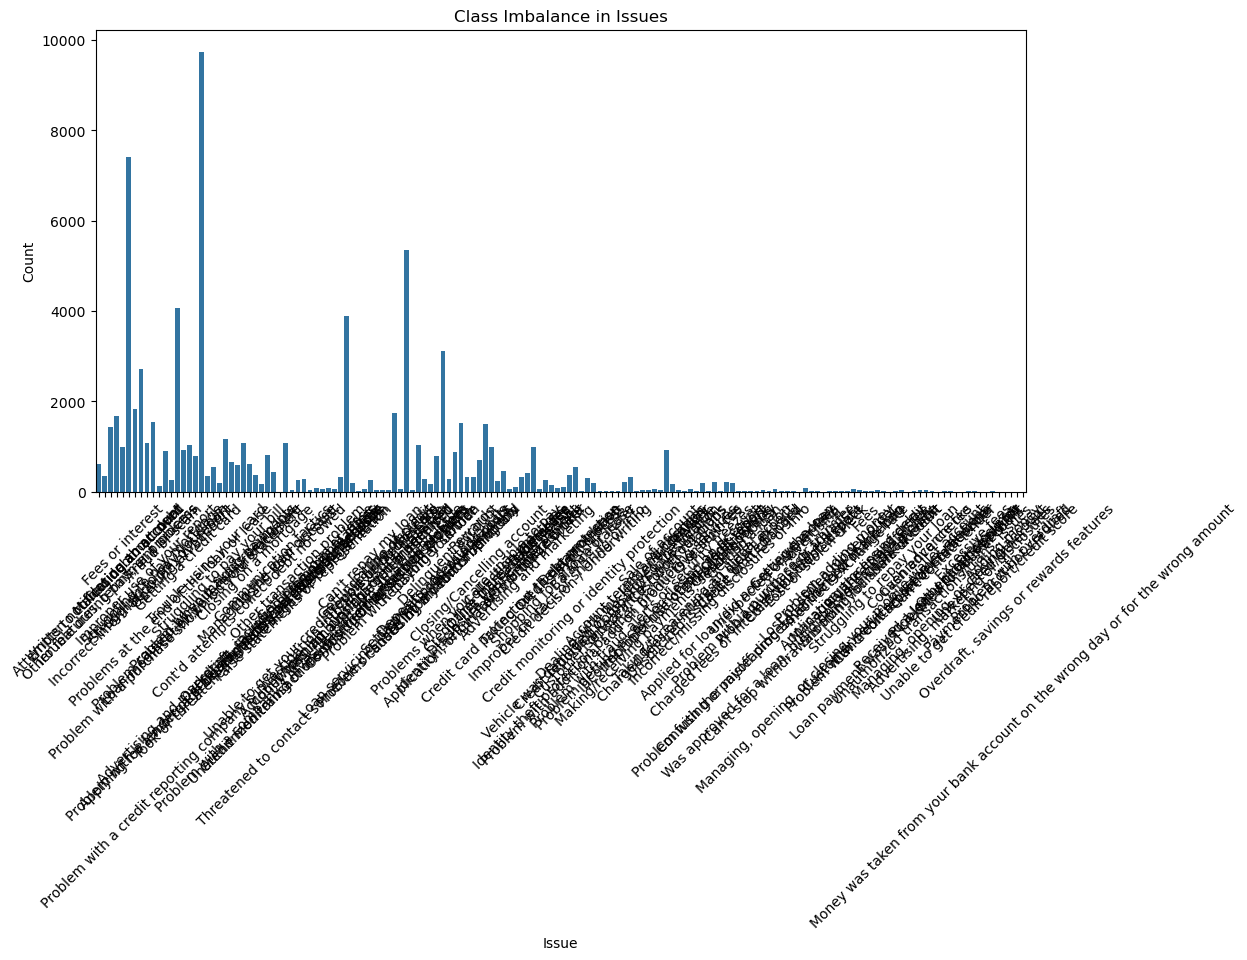

In [956]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot graph to check class imbalance for 'issue'
plt.figure(figsize=(12, 6))
sns.countplot(x='issue', data=df_combined)  # Use 'issue' or another relevant column name
plt.title('Class Imbalance in Issues')
plt.xlabel('Issue')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

In [957]:
print(df_combined['issue'].value_counts())

issue
Loan modification,collection,foreclosure                                           9743
Managing an account                                                                7410
Loan servicing, payments, escrow account                                           5360
Problem with a purchase shown on your statement                                    4055
Account opening, closing, or management                                            3879
                                                                                   ... 
Unable to get credit report/credit score                                              1
Advertising, marketing or disclosures                                                 1
Problem with an overdraft                                                             1
Can't stop withdrawals from your bank account                                         1
Money was taken from your bank account on the wrong day or for the wrong amount       1
Name: count, Length: 154, 

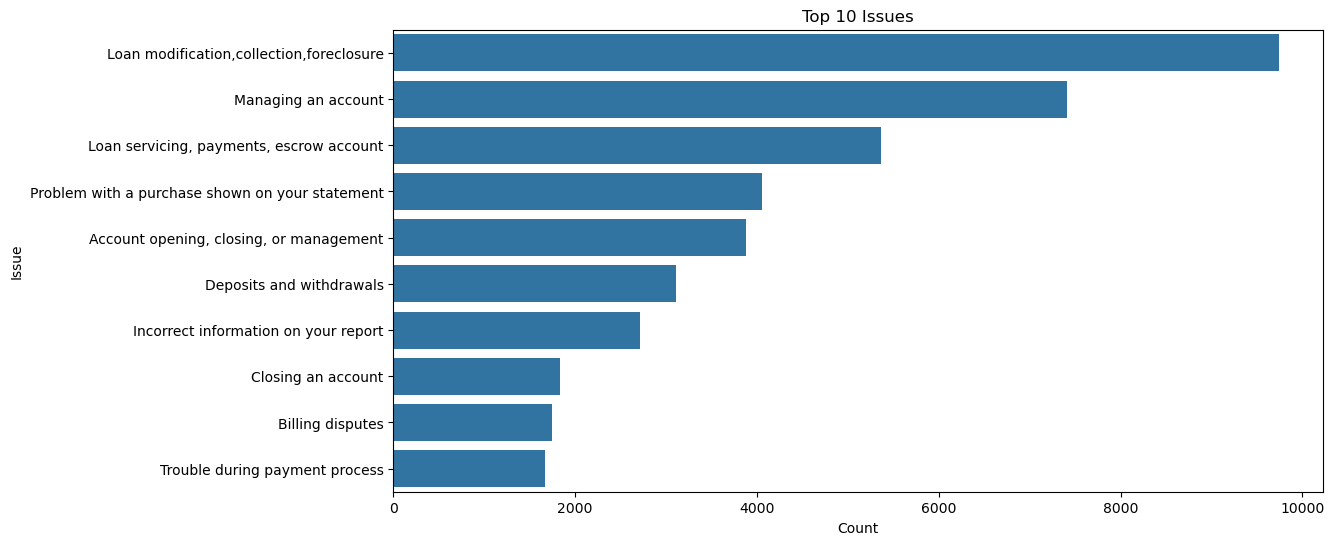

In [958]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 issues
top_issues = df_combined['issue'].value_counts().nlargest(10)

# Plot graph to check class imbalance for top issues
plt.figure(figsize=(12, 6))
sns.barplot(x=top_issues.values, y=top_issues.index)  # Horizontal bar plot for better readability
plt.title('Top 10 Issues')
plt.xlabel('Count')
plt.ylabel('Issue')
plt.show()

In [959]:
# Step 7 Model training and evaluation

In [960]:
##Model building using supervised learning, Model training & evaluation

In [961]:
###Supervised model to predict any new complaints to the relevant Topics. -We now build the model to create the topics for each complaints.Now in the below section you will use them to classify any new complaints.Since you will be using supervised learning technique we have to convert the topic names to numbers(numpy arrays only understand numbers)

In [962]:
##Preprocessing for model

In [1135]:
print(df_clean.columns)

Index(['Complaint_clean', 'Topic'], dtype='object')


In [1139]:
# Create the training_data DataFrame with the correct column names
training_data = df_clean[['Complaint_clean', 'Topic']]

# Display the first few rows of the training_data to confirm
print(training_data.head())

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Complaint_clean  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
1  good morning my n

In [1147]:
print(df_clean[['Complaint_clean', 'Topic']].isnull().sum())

Complaint_clean        0
Topic              78313
dtype: int64


In [1149]:
print(df_clean[df_clean['Topic'].isnull()])

In [1151]:
# Check the count of NaN values in both columns
print(df_clean[['Complaint_clean', 'Topic']].isnull().sum())

# Display rows where Topic is NaN
print(df_clean[df_clean['Topic'].isnull()])

Complaint_clean        0
Topic              78313
dtype: int64
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [1153]:
# Now, keep the relevant columns in the new DataFrame
training_data = df_clean[['Complaint_clean', 'Topic']]
print(training_data.head())

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Complaint_clean  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
1  good morning my n

In [1155]:
training_data.head()

,Complaint_clean,Topic
0,,NaN
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin 2018 i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,NaN
2,i upgraded my xxxx xxxx card in xxxx2018 and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,NaN
3,,NaN
4,,NaN


In [1157]:
# Step 8Reverse topic names mapping for supervised learning

In [1159]:
## Reverse topic names mapping for supervised learning

reverse_topic_mapping = {
    'Bank Account services' :0,
    'Credit card or prepaid card':1,
    'Others':2,
    'Theft/Dispute Reporting':3,
    'Mortgage/Loan':4
}
#Replace Topics with Topic Names
training_data['Topic'] = training_data['Topic'].map(reverse_topic_mapping)
training_data.head()

,Complaint_clean,Topic
0,,NaN
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin 2018 i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,NaN
2,i upgraded my xxxx xxxx card in xxxx2018 and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xxxxxxxx to xxxxxxxx without my consent xxxx has the recording of the agent who was misled me,NaN
3,,NaN
4,,NaN


In [1171]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Sample DataFrame for context (Make sure to replace this with your actual training_data)
# training_data = pd.DataFrame({'Complaint_clean': [...], 'Topic': [...]})

# Step 1: Create vector counts using CountVectorizer
count_vectorizer = CountVectorizer()
X_counts = count_vectorizer.fit_transform(training_data['Complaint_clean'])

# Step 2: Transform the word vector to TF-IDF
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

# Step 3: Prepare the target variable
y = training_data['Topic']

# Step 4: Create the train and test data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f'Train data shape: {X_train.shape}, Test data shape: {X_test.shape}')
print(f'Train labels shape: {y_train.shape}, Test labels shape: {y_test.shape}')

Train data shape: (62650, 36549), Test data shape: (15663, 36549)
Train labels shape: (62650,), Test labels shape: (15663,)


In [1163]:
## X-Y Split

In [1255]:
print(cleaned_data.columns)

Index(['Complaint_clean'], dtype='object')


In [1257]:
# X-Y Split
X = training_data['Complaint_clean']  # Correct column name for the complaint text
y = training_data['Topic']  # Topic labels

# Assuming reverse_topic_mapping is a dictionary mapping the old topic names to new ones
# Replace Topics with Topic Names
y = y.map(reverse_topic_mapping)

# Display the first few rows to confirm
print(training_data.head())

Empty DataFrame
Columns: [Complaint_clean, Topic]
Index: []


In [1259]:
# Ensure you're using the right column names
X = training_data['Complaint_clean']  # Use the correct column name for the complaint text
y = training_data['Topic']  # Topic labels

# Optionally, check the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Display the first few entries of X and y to confirm
print(X.head())
print(y.head())

Shape of X: (0,)
Shape of y: (0,)
Series([], Name: Complaint_clean, dtype: object)
Series([], Name: Topic, dtype: float64)


In [1261]:
# Check for NaN values
print("Number of NaN values in X:", X.isnull().sum())  # Check for NaNs in X
print("Number of NaN values in y:", y.isnull().sum())  # Check for NaNs in y

# Optionally, drop rows with NaN values in the relevant columns
training_data = training_data.dropna(subset=['Complaint_clean', 'Topic'])

# Reassign X and y after dropping NaN values
X = training_data['Complaint_clean']  # Update this to match your actual column name
y = training_data['Topic']

# Display the shape of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Number of NaN values in X: 0
Number of NaN values in y: 0
Shape of X: (0,)
Shape of y: (0,)


In [1263]:
# Update X and y to use the correct column names
X = training_data['Complaint_clean']  # This is the column containing the complaints
y = training_data['Topic']  # This is the column for the topics

# Check for NaN values
print("Number of NaN values in X:", X.isnull().sum())  # Check for NaNs in X
print("Number of NaN values in y:", y.isnull().sum())  # Check for NaNs in y

# Optionally, drop rows with NaN values in both columns
training_data = training_data.dropna(subset=['Complaint_clean', 'Topic'], how='all')

# Reassign X and y after dropping NaN values
X = training_data['Complaint_clean']  # Update this to match your actual column name
y = training_data['Topic']

# Display the shape of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Check for NaN values again
print("Number of NaN values in X after drop:", X.isnull().sum())
print("Number of NaN values in y after drop:", y.isnull().sum())

Number of NaN values in X: 0
Number of NaN values in y: 0
Shape of X: (0,)
Shape of y: (0,)
Number of NaN values in X after drop: 0
Number of NaN values in y after drop: 0


In [1304]:
import re

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', ' ', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [1306]:
# Check for empty strings in the Complaint_clean column
empty_strings = training_data['Complaint_clean'][training_data['Complaint_clean'].str.strip() == '']

# Display empty strings if any
print(empty_strings)

Series([], Name: Complaint_clean, dtype: object)


In [1308]:
def clean_text(text):
    if pd.isnull(text) or not isinstance(text, str):
        return ''  # Return empty string if input is NaN or not a string
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', ' ', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [1271]:
# Remove rows with empty or whitespace strings in 'Complaint_clean'
training_data = training_data[training_data['Complaint_clean'].str.strip() != '']

# Check if there are still valid complaints
print("Number of valid complaints:", training_data.shape[0])

# Import the required library
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Vectorize the cleaned text from the appropriate column in your DataFrame
X_vectorized = vectorizer.fit_transform(training_data['Complaint_clean'])

# Display the shape of the vectorized output
print("Shape of vectorized data:", X_vectorized.shape)

Number of valid complaints: 0


ValueError: empty vocabulary; perhaps the documents only contain stop words

In [1273]:
import pandas as pd

# Load the JSON file again to check the original data
json_file_path = 'C:\\Users\\Admin\\OneDrive\\Desktop\\Manasa Files\\AI & ML\\Automatic Ticket Creation -NLP\\complaints-2021-05-14_08_16 (2).json'
original_data = pd.read_json(json_file_path)

# Display the first few rows and count of the original data
print(original_data.head(10))  # Show the first 10 entries
print("Total entries in original data:", original_data.shape[0])  # Count of total entries

                _index      _type      _id  _score  \
0  complaint-public-v2  complaint  3211475       0   
1  complaint-public-v2  complaint  3229299       0   
2  complaint-public-v2  complaint  3199379       0   
3  complaint-public-v2  complaint  2673060       0   
4  complaint-public-v2  complaint  3203545       0   
5  complaint-public-v2  complaint  3275312       0   
6  complaint-public-v2  complaint  3238804       0   
7  complaint-public-v2  complaint  3249272       0   
8  complaint-public-v2  complaint  3351653       0   
9  complaint-public-v2  complaint  3273612       0   

                                                                                                                                                                                                                                                                                                                                                                                                                     

In [1274]:
# Check the original Complaint_clean column for valid entries
print(training_data['Complaint_clean'].unique())  # Print unique complaints
print("Total number of entries in Complaint_clean:", training_data['Complaint_clean'].count())  # Count non-empty entries

# Optionally, print the first few rows to inspect the data
print(training_data.head(10))  # Display the first 10 entries

[]
Total number of entries in Complaint_clean: 0
Empty DataFrame
Columns: [Complaint_clean, Topic]
Index: []


In [1275]:
# Extract complaints from the _source field
complaints = original_data['_source'].apply(lambda x: x['complaint_what_happened'])

# Create a new DataFrame with valid complaints
cleaned_data = pd.DataFrame({'Complaint_clean': complaints})

# Remove empty complaints
cleaned_data = cleaned_data[cleaned_data['Complaint_clean'].str.strip() != '']

# Display the cleaned DataFrame
print("Total number of valid complaints in cleaned data:", cleaned_data.shape[0])
print(cleaned_data.head(10))  # Display the first 10 entries

Total number of valid complaints in cleaned data: 21072
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [1276]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming cleaned_data is your DataFrame with valid complaints
vectorizer = TfidfVectorizer()

# Vectorize the cleaned text from the appropriate column
X_vectorized = vectorizer.fit_transform(cleaned_data['Complaint_clean'])

# Display the shape of the vectorized output
print("Shape of vectorized data:", X_vectorized.shape)

Shape of vectorized data: (21072, 29725)


In [1454]:
# Create a DataFrame with complaints and their corresponding topics
cleaned_data = pd.DataFrame({
    'Complaint_clean': complaints,
    'Topic': original_data['_source'].apply(lambda x: x.get('topic', None))  # Ensure you replace 'topic' with the correct field
})

# Remove empty complaints
cleaned_data = cleaned_data[cleaned_data['Complaint_clean'].str.strip() != '']


In [1456]:
y = cleaned_data['Topic']

In [1458]:
print("Shape of X_vectorized:", X_vectorized.shape)
print("Shape of y:", y.shape)

Shape of X_vectorized: (21072, 29725)
Shape of y: (21072,)


In [1460]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.25, random_state=40, stratify=y)

TypeError: '<' not supported between instances of 'NoneType' and 'NoneType'

In [1462]:
print("Number of missing values in y:", y.isnull().sum())

Number of missing values in y: 21072


In [1466]:
# Remove rows where y is missing
mask = y.notnull()
X_vectorized = X_vectorized[mask]
y = y[mask]

In [1468]:
# Fill missing values with a placeholder
y.fillna('unknown', inplace=True)

In [1472]:
# Check initial non-missing values
print("Initial number of non-missing values in y:", y.notnull().sum())

# If y is completely empty, you may want to stop here or fill it properly
if y.isnull().all():
    print("y contains all missing values. Please check your data source.")
else:
    # Remove rows where y is missing
    mask = y.notnull()
    X_vectorized = X_vectorized[mask]
    y = y[mask]

    # Now try to split the data again
    X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.25, random_state=40, stratify=y)

Initial number of non-missing values in y: 0
y contains all missing values. Please check your data source.


In [1474]:
# Check available columns in cleaned_data
print(cleaned_data.columns)

# Assume 'label_column' is where your labels should be
if 'label_column' in cleaned_data.columns:
    y = cleaned_data['label_column']
else:
    print("Label column not found in cleaned_data.")

# Check non-missing values again
print("Initial number of non-missing values in y:", y.notnull().sum())

# Proceed only if y has valid data
if y.notnull().sum() > 0:
    mask = y.notnull()
    X_vectorized = X_vectorized[mask]
    y = y[mask]

    # Now try to split the data again
    X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.25, random_state=40, stratify=y)
else:
    print("y contains all missing values. Please check your data source.")

Index(['Complaint_clean', 'Topic'], dtype='object')
Label column not found in cleaned_data.
Initial number of non-missing values in y: 0
y contains all missing values. Please check your data source.


In [1476]:
# Check available columns in cleaned_data
print(cleaned_data.columns)

# Assign y from the 'Topic' column
if 'Topic' in cleaned_data.columns:
    y = cleaned_data['Topic']
    print("y assigned from 'Topic' column.")
else:
    print("Label column 'Topic' not found in cleaned_data.")

# Check non-missing values again
print("Initial number of non-missing values in y:", y.notnull().sum())

# Proceed only if y has valid data
if y.notnull().sum() > 0:
    mask = y.notnull()
    X_vectorized = X_vectorized[mask]
    y = y[mask]

    # Now try to split the data again
    X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.25, random_state=40, stratify=y)
    print("Train-test split successful.")
else:
    print("y contains all missing values. Please check your data source.")

Index(['Complaint_clean', 'Topic'], dtype='object')
y assigned from 'Topic' column.
Initial number of non-missing values in y: 0
y contains all missing values. Please check your data source.


In [1478]:
# Check unique values in 'Topic'
print("Unique values in 'Topic':", cleaned_data['Topic'].unique())

# Count missing values in 'Topic'
print("Number of missing values in 'Topic':", cleaned_data['Topic'].isnull().sum())

# Inspect rows with missing 'Topic'
print("Rows with missing 'Topic':")
print(cleaned_data[cleaned_data['Topic'].isnull()])

Unique values in 'Topic': [None]
Number of missing values in 'Topic': 21072
Rows with missing 'Topic':
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [1480]:
# Remove rows where 'Topic' is None
cleaned_data = cleaned_data[cleaned_data['Topic'].notnull()]

# Re-assign y
y = cleaned_data['Topic']

# Check the updated y values
print("Updated number of non-missing values in y:", y.notnull().sum())

Updated number of non-missing values in y: 0


In [1482]:
print("Unique values in 'Topic':", cleaned_data['Topic'].unique())

Unique values in 'Topic': []


In [1484]:
# Count empty strings or whitespace
empty_strings = cleaned_data['Topic'].str.strip() == ''
print("Number of empty strings in 'Topic':", empty_strings.sum())

Number of empty strings in 'Topic': 0


In [1486]:
# Remove rows where 'Topic' is None or empty
cleaned_data = cleaned_data[cleaned_data['Topic'].notnull() & (cleaned_data['Topic'].str.strip() != '')]

# Re-assign y
y = cleaned_data['Topic']

# Check the updated y values
print("Updated number of non-missing values in y:", y.notnull().sum())

Updated number of non-missing values in y: 0


In [1488]:
print("Unique values in 'Topic' after cleaning:", cleaned_data['Topic'].unique())
print("Number of missing values in 'Topic' after cleaning:", cleaned_data['Topic'].isnull().sum())

Unique values in 'Topic' after cleaning: []
Number of missing values in 'Topic' after cleaning: 0


In [1490]:
print(cleaned_data.columns)

Index(['Complaint_clean', 'Topic'], dtype='object')


In [1492]:
print(cleaned_data.head())

Empty DataFrame
Columns: [Complaint_clean, Topic]
Index: []


In [1310]:
# Check the columns in the cleaned data
print(cleaned_data.columns)  # Identify the exact column name for your target variable

# Remove any leading/trailing spaces in the column names
cleaned_data.columns = cleaned_data.columns.str.strip()

# Now check the columns again to ensure spaces are removed
print(cleaned_data.columns)

# Update your target variable based on the correct column name
y = cleaned_data['Topic']  # or use the exact name found in the previous step
X = X_vectorized  # Your features

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Index(['Complaint_clean'], dtype='object')
Index(['Complaint_clean'], dtype='object')


KeyError: 'Topic'

In [1494]:
# Assuming original_data is the DataFrame you started with
print(original_data.head())
print(original_data['Topic'].isnull().sum())  # Check for nulls in the original Topic column

                _index      _type      _id  _score  \
0  complaint-public-v2  complaint  3211475       0   
1  complaint-public-v2  complaint  3229299       0   
2  complaint-public-v2  complaint  3199379       0   
3  complaint-public-v2  complaint  2673060       0   
4  complaint-public-v2  complaint  3203545       0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

KeyError: 'Topic'

In [1496]:
print("Shape of cleaned_data before any cleaning:", cleaned_data.shape)

# After any filtering, check the shape
cleaned_data = cleaned_data[cleaned_data['Topic'].notnull()]
print("Shape after removing None:", cleaned_data.shape)

Shape of cleaned_data before any cleaning: (0, 2)
Shape after removing None: (0, 2)


In [1312]:
print(cleaned_data.head())  # Display the first few rows of the DataFrame

In [1498]:
cleaned_data = cleaned_data[cleaned_data['Topic'].notnull() & (cleaned_data['Topic'].str.strip() != '')]
print("Shape after cleaning Topic column:", cleaned_data.shape)

Shape after cleaning Topic column: (0, 2)


In [1500]:
# Remove any leading/trailing spaces in the column names
cleaned_data.columns = cleaned_data.columns.str.strip()
print("Columns after stripping spaces:", cleaned_data.columns)

Columns after stripping spaces: Index(['Complaint_clean', 'Topic'], dtype='object')


In [1502]:
print("Final shape of cleaned_data:", cleaned_data.shape)
if cleaned_data.empty:
    print("cleaned_data is empty. Please check the data source and cleaning steps.")
else:
    # Proceed if not empty
    y = cleaned_data['Topic']
    X = X_vectorized  # Your features

Final shape of cleaned_data: (0, 2)
cleaned_data is empty. Please check the data source and cleaning steps.


In [1506]:
# Assuming original_data is your starting DataFrame
print("Shape of original data:", original_data.shape)
print("Preview of original data:\n", original_data.head())

Shape of original data: (78313, 5)
Preview of original data:
                 _index      _type      _id  _score  \
0  complaint-public-v2  complaint  3211475       0   
1  complaint-public-v2  complaint  3229299       0   
2  complaint-public-v2  complaint  3199379       0   
3  complaint-public-v2  complaint  2673060       0   
4  complaint-public-v2  complaint  3203545       0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [1508]:
print("Number of missing values in 'Topic':", original_data['Topic'].isnull().sum())

KeyError: 'Topic'

In [1504]:
from sklearn.model_selection import train_test_split

# Ensure y has non-null values before splitting
if y.notnull().sum() > 0:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Training set size:", X_train.shape)
    print("Testing set size:", X_test.shape)
else:
    print("y contains all missing values. Please check your data source.")

y contains all missing values. Please check your data source.


In [1314]:
#topics_df = pd.read_csv('C:/Users/Admin/OneDrive/Desktop/Manasa Files/AI & ML/actual_file_name.csv')  # Replace with the correct path

In [1316]:
# Assuming 'Complaint_ID' is the common column for merging
merged_data = cleaned_data.merge(topics_df, on='Complaint_ID')  # Replace 'Complaint_ID' with your actual merge key

# Check the merged DataFrame
print(merged_data.head())

NameError: name 'topics_df' is not defined

In [1318]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the cleaned complaints data (update the path to your cleaned data)
cleaned_data = pd.read_csv('C:/Users/Admin/OneDrive/Desktop/Manasa Files/AI & ML/YourCleanedData.csv')  # Replace this with the correct path

# Load the topics DataFrame from a CSV file (update the path to your topics data)
topics_df = pd.read_csv('C:/Users/Admin/OneDrive/Desktop/Manasa Files/AI & ML/YourTopicsData.csv')  # Replace this with the correct path

# Check the contents of the topics DataFrame
print(topics_df.head())

# Merge the cleaned data with the topics data
merged_data = cleaned_data.merge(topics_df, on='Complaint_ID')  # Adjust 'Complaint_ID' to your merge key

# Check the merged DataFrame
print(merged_data.columns)

# Prepare the features and target variable
X = merged_data['Complaint_clean']  # Update this if your feature name is different
y = merged_data['Topic']  # Update this if your target variable is different

# Vectorize the features (you can use CountVectorizer or TfidfVectorizer)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Print the sizes of the training and testing sets
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Admin/OneDrive/Desktop/Manasa Files/AI & ML/YourCleanedData.csv'

In [1320]:
import re
import string

def clean_text(text):
    if pd.isnull(text):  # Check for NaN
        return ''
    # Convert to lower case
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [1322]:
# Clean the text data again
X_cleaned = X.apply(clean_text)

In [1324]:
print("Cleaned data sample:")
print(X_cleaned.head())

Cleaned data sample:
Series([], Name: Complaint_clean, dtype: object)


In [1326]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Check for NaN and empty strings in X_cleaned
print(X_cleaned.head())
print(X_cleaned.isnull().sum())
print((X_cleaned == '').sum())

# Remove empty strings and NaN values
X_cleaned = X_cleaned[X_cleaned.str.strip() != '']
X_cleaned = X_cleaned.dropna()

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')  # or CountVectorizer()

# Fit and transform the cleaned text data
X_vectorized = vectorizer.fit_transform(X_cleaned)

# Check the shape of the vectorized data
print("Shape of the vectorized X:", X_vectorized.shape)

Series([], Name: Complaint_clean, dtype: object)
0
0


ValueError: empty vocabulary; perhaps the documents only contain stop words

In [ ]:
import pandas as pd

# Specify the file path
file_path = r'C:\Users\Admin\OneDrive\Desktop\Manasa Files\AI & ML\Automatic Ticket Creation -NLP\complaints-2021-05-14_08_16 (1).json'

# Load the JSON file into a DataFrame
df = pd.read_json(file_path)

# Check the first few entries
print("First few entries in the DataFrame:")
print(df.head())

# Check for NaN values in the specific column
column_name = '_source.complaint_what_happened'  # Update this if the actual column name is different
nan_count = df[column_name].isnull().sum()
print(f"Number of NaN values in '{column_name}':", nan_count)

# Check for empty strings in the specific column
empty_string_count = (df[column_name] == '').sum()
print(f"Number of empty strings in '{column_name}':", empty_string_count)

In [1327]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the cleaned complaints data (update the path to your cleaned data)
cleaned_data = pd.read_csv('C:/Users/Admin/OneDrive/Desktop/Manasa Files/AI & ML/YourCleanedData.csv')  # Update this path

# Load the topics DataFrame from a CSV file (update the path to your topics data)
topics_df = pd.read_csv('C:/Users/Admin/OneDrive/Desktop/Manasa Files/AI & ML/YourTopicsData.csv')  # Update this path

# Check the contents of the topics DataFrame
print(topics_df.head())

# Merge the cleaned data with the topics data
merged_data = cleaned_data.merge(topics_df, on='Complaint_ID')  # Adjust 'Complaint_ID' to your merge key

# Check the merged DataFrame
print(merged_data.columns)

# Prepare the features and target variable
X = merged_data['Complaint_clean']  # Update this if your feature name is different
y = merged_data['Topic']  # Update this if your target variable is different

# Vectorize the features (you can use CountVectorizer or TfidfVectorizer)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Print the sizes of the training and testing sets
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Admin/OneDrive/Desktop/Manasa Files/AI & ML/YourCleanedData.csv'

In [ ]:
df_cleaned = df[df['complaint_what_happened'] != '']

In [1331]:
df['complaint_what_happened'] = df['complaint_what_happened'].replace('', 'No description provided')

KeyError: 'complaint_what_happened'

In [ ]:
df['complaint_what_happened'] = df['complaint_what_happened'].replace('', 'No description provided')

In [1334]:
# Verify the replacement
print(df['complaint_what_happened'].value_counts())

KeyError: 'complaint_what_happened'

In [ ]:
print(df.columns.tolist())

In [1337]:
# Extract the 'issue' from the '_source' column
df['issue'] = df['_source'].apply(lambda x: x.get('issue'))

# Now you can get the value counts
print(df['issue'].value_counts())

issue
Loan modification,collection,foreclosure                                           9743
Managing an account                                                                7410
Loan servicing, payments, escrow account                                           5360
Problem with a purchase shown on your statement                                    4055
Account opening, closing, or management                                            3879
                                                                                   ... 
Unable to get credit report/credit score                                              1
Advertising, marketing or disclosures                                                 1
Problem with an overdraft                                                             1
Can't stop withdrawals from your bank account                                         1
Money was taken from your bank account on the wrong day or for the wrong amount       1
Name: count, Length: 154, 

C:\Users\Admin\AppData\Local\Temp\ipykernel_8736\4023972427.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Issue', data=issue_counts, palette='viridis')


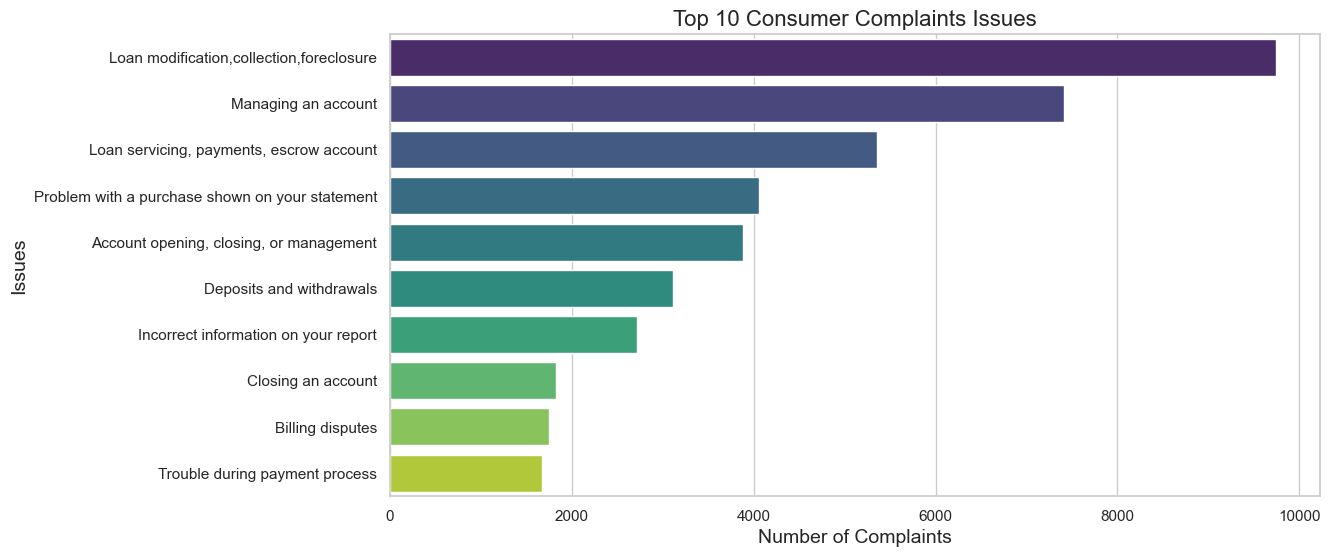

In [1338]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with the 'issue' counts
issue_counts = df['_source'].apply(lambda x: x['issue']).value_counts().head(10)  # Get the top 10 issues

# Reset index for better plotting
issue_counts = issue_counts.reset_index()
issue_counts.columns = ['Issue', 'Count']  # Rename columns

# Set the visual style
sns.set(style="whitegrid")

# Create the barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Issue', data=issue_counts, palette='viridis')

# Add titles and labels
plt.title('Top 10 Consumer Complaints Issues', fontsize=16)
plt.xlabel('Number of Complaints', fontsize=14)
plt.ylabel('Issues', fontsize=14)
plt.show()

In [1339]:
# Extract the 'issue' from the '_source' column and get value counts
issue_counts = df['_source'].apply(lambda x: x['issue']).value_counts()

# Print the value counts for the issues
print(issue_counts)

_source
Loan modification,collection,foreclosure                                           9743
Managing an account                                                                7410
Loan servicing, payments, escrow account                                           5360
Problem with a purchase shown on your statement                                    4055
Account opening, closing, or management                                            3879
                                                                                   ... 
Unable to get credit report/credit score                                              1
Advertising, marketing or disclosures                                                 1
Problem with an overdraft                                                             1
Can't stop withdrawals from your bank account                                         1
Money was taken from your bank account on the wrong day or for the wrong amount       1
Name: count, Length: 154

In [1341]:
# Check if X_cleaned is empty or has any NaN values
print(X_cleaned.isnull().sum())  # Check for NaN values
print(X_cleaned.shape)            # Check the shape of the DataFrame

0
(0,)


In [1342]:
# Sample 10 entries, if X_cleaned is not empty
if not X_cleaned.empty:
    sample_data = X_cleaned.sample(n=min(10, len(X_cleaned)), random_state=1)  # Ensures you don't sample more than available
    print(sample_data)
else:
    print("X_cleaned is empty. Cannot sample.")

X_cleaned is empty. Cannot sample.


In [1343]:
# Replace 'df' with the actual name of your DataFrame
print("Original DataFrame shape:", df.shape)
print(df.head())  # Displays the first few rows of the DataFrame

Original DataFrame shape: (78313, 6)
                _index      _type      _id  _score  \
0  complaint-public-v2  complaint  3211475       0   
1  complaint-public-v2  complaint  3229299       0   
2  complaint-public-v2  complaint  3199379       0   
3  complaint-public-v2  complaint  2673060       0   
4  complaint-public-v2  complaint  3203545       0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [1346]:
print(df.isnull().sum())  # Check for null values in each column

_index     0
_type      0
_id        0
_score     0
_source    0
issue      0
dtype: int64


In [1348]:
# Example of cleaning steps
# Assuming you have some cleaning process
# For instance, removing rows with null values in a specific column
intermediate_dataframe = df.dropna(subset=['complaint_what_happened', 'issue'])  # Adjust as needed
print("Shape after cleaning:", intermediate_dataframe.shape)

KeyError: ['complaint_what_happened']

In [1591]:
# Assuming X_cleaned is populated correctly
if not X_cleaned.empty:
    sample_data = X_cleaned.sample(n=min(10, len(X_cleaned)), random_state=1)
    print("Sampled data:")
    print(sample_data)
else:
    print("X_cleaned is empty. Cannot sample.")

X_cleaned is empty. Cannot sample.


In [1351]:
# Check the original DataFrame
print("Original DataFrame shape:", df.shape)
print(df.head())  # Display the first few rows of the original DataFrame

Original DataFrame shape: (78313, 6)
                _index      _type      _id  _score  \
0  complaint-public-v2  complaint  3211475       0   
1  complaint-public-v2  complaint  3229299       0   
2  complaint-public-v2  complaint  3199379       0   
3  complaint-public-v2  complaint  2673060       0   
4  complaint-public-v2  complaint  3203545       0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [1448]:
# Assuming your original DataFrame is named 'df'
print("Missing values in original DataFrame:")
print(df.isnull().sum())  # Check for missing values in all columns

Missing values in original DataFrame:
_index     0
_type      0
_id        0
_score     0
_source    0
issue      0
dtype: int64


In [1357]:
# Print the shape before cleaning
print("Shape before cleaning:", df.shape)

# Drop rows with missing values in specific columns
X_cleaned = df[['complaint_what_happened', 'issue']].dropna()
print("Shape after dropping NAs:", X_cleaned.shape)

# Further filtering if needed
# Check if any entries remain after filtering
print("Entries remaining after filtering:", X_cleaned.shape[0])

# Display a sample to ensure it's populated
if not X_cleaned.empty:
    sample_data = X_cleaned.sample(n=min(10, len(X_cleaned)), random_state=1)
    print("Sampled data:")
    print(sample_data)
else:
    print("X_cleaned is empty. Cannot sample.")

Shape before cleaning: (78313, 6)


KeyError: "['complaint_what_happened'] not in index"

In [1358]:
print(X_cleaned.sample(10))  # Print a random sample of 10 cleaned complaints

ValueError: a must be greater than 0 unless no samples are taken

In [1359]:
# Check the shape of the original DataFrame
print("Original DataFrame shape:", df.shape)

# Create X_cleaned from the original DataFrame
X_cleaned = df[['complaint_what_happened', 'issue']].dropna()  # Adjust as necessary
print("Shape of X_cleaned after cleaning:", X_cleaned.shape)

# Display the first few rows to confirm
print(X_cleaned.head())

Original DataFrame shape: (78313, 6)


KeyError: "['complaint_what_happened'] not in index"

In [1362]:
# x - y  split
X = training_data.complaint_text
y = training_data.Topic

AttributeError: 'DataFrame' object has no attribute 'complaint_text'

In [1363]:
print(training_data.columns)

Index(['Complaint_clean', 'Topic'], dtype='object')


In [1366]:
# Check for NaN values in the original column
nan_count = training_data['_source.complaint_what_happened'].isna().sum()
print(f"Number of NaN values: {nan_count}")

KeyError: '_source.complaint_what_happened'

In [ ]:
empty_count = (training_data['_source.complaint_what_happened'].str.strip() == '').sum()
print(f"Number of empty strings: {empty_count}")

In [1369]:
print("Shape of the training_data DataFrame:", training_data.shape)

Shape of the training_data DataFrame: (0, 2)


In [1370]:
print("Shape of the complaint column:", training_data['_source.complaint_what_happened'].shape)

KeyError: '_source.complaint_what_happened'

In [1371]:
nan_count = training_data['_source.complaint_what_happened'].isna().sum()
empty_count = (training_data['_source.complaint_what_happened'].str.strip() == '').sum()

print(f"Number of NaN values: {nan_count}")
print(f"Number of empty strings: {empty_count}")

KeyError: '_source.complaint_what_happened'

In [1373]:
print("Number of entries in training_data:", len(training_data))

Number of entries in training_data: 0


In [1375]:
print("Data type of the complaint column:", training_data['_source.complaint_what_happened'].dtype)

KeyError: '_source.complaint_what_happened'

In [1377]:
print("Unique values in the complaint column:")
print(training_data['_source.complaint_what_happened'].unique()[:10])  # Display the first 10 unique values

Unique values in the complaint column:


KeyError: '_source.complaint_what_happened'

In [1379]:
# Sample 10 entries, if the DataFrame is not empty
if len(training_data) > 0:
    sample_data = training_data.sample(n=min(10, len(training_data)), random_state=1)
    print("Sampled data:")
    print(sample_data)
else:
    print("Training data is empty. Cannot sample.")

Training data is empty. Cannot sample.


In [1380]:
import pandas as pd

# Example for loading from a CSV file
training_data = pd.read_csv('path_to_your_file.csv')

# Or if it's a JSON file
# training_data = pd.read_json('path_to_your_file.json')

# Check the shape and content
print("Shape of training_data after loading:", training_data.shape)
print("First few entries in training_data:")
print(training_data.head())

FileNotFoundError: [Errno 2] No such file or directory: 'path_to_your_file.csv'

In [1381]:
# Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer

# Make sure X is properly cleaned and doesn't contain NaNs
# Fit transform the X using CountVectorizer
count_vect = CountVectorizer()
X_vect = count_vect.fit_transform(X)

# Get the vector count
print("Shape of the vectorized X:", X_vect.shape)  # Prints the dimensions of the resulting sparse matrix

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [1383]:
# Remove any rows where the complaint text is NaN or empty
X = training_data['_source.complaint_what_happened'].dropna().str.strip()
X = X[X != '']  # Remove empty strings

# Check the shape after cleaning
print("Shape of X after cleaning:", X.shape)

KeyError: '_source.complaint_what_happened'

In [1385]:
if X.empty:
    print("X is empty after cleaning. Cannot proceed with vectorization.")
else:
    # Proceed with vectorization if not empty
    count_vect = CountVectorizer()
    X_vect = count_vect.fit_transform(X)
    print("Shape of the vectorized X:", X_vect.shape)  # Prints the dimensions of the resulting sparse matrix

X is empty after cleaning. Cannot proceed with vectorization.


In [1387]:
# Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer

# Assuming X contains your complaint text
# Make sure X is properly cleaned and doesn't contain NaNs

# Fit transform the X using CountVectorizer
count_vect = CountVectorizer()
X_vect = count_vect.fit_transform(X)

# Get the vector count
print("Shape of the vectorized X:", X_vect.shape)  # Prints the dimensions of the resulting sparse matrix

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [1389]:
from sklearn.feature_extraction.text import TfidfTransformer
#Write your code here to transform the word vector to tf-idf
#Fit transform word vector to TF-IDF
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_vect)

NameError: name 'X_vect' is not defined

In [1391]:
##Train Test Split

In [1587]:
from sklearn.model_selection import train_test_split
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.25, random_state=40, stratify=y)

ValueError: Found input variables with inconsistent numbers of samples: [78313, 0]

In [1589]:
### You have to try atleast 3 models on the train & test data from these options-We are trying the following models -
#### Logistic regression
#### Decision Tree
#### Random Forest
#### Naive Bayes (optional)


In [1565]:
##Logistic regression, Decision Tree & Random Forest

In [1567]:
# Write your code here to build any 3 models and evaluate them using the required metrics

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [1569]:
###Custom Classification Report

In [1571]:
# utlity function to display the model report

def display_classification_report(model,metric):
    
    y_train_pred_proba = model.predict_proba(X_train)
    y_test_pred_proba = model.predict_proba(X_test)
    roc_auc_score_train = round(roc_auc_score(y_train, y_train_pred_proba,average='weighted',multi_class='ovr'),2)
    roc_auc_score_test = round(roc_auc_score(y_test, y_test_pred_proba,average='weighted',multi_class='ovr'),2)
    print("ROC AUC Score Train:", roc_auc_score_train)
    print("ROC AUC Score Test:", roc_auc_score_test)
    metric.append(roc_auc_score_train)
    metric.append(roc_auc_score_test)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
  
    precision_train,recall_train,fscore_train,support_train=precision_recall_fscore_support(y_train,y_train_pred,average='weighted')
    precision_test,recall_test,fscore_test,support_test=precision_recall_fscore_support(y_test,y_test_pred,average='weighted')
    
    acc_score_train = round(accuracy_score(y_train,y_train_pred),2)
    acc_score_test = round(accuracy_score(y_test,y_test_pred),2)
    
    metric.append(acc_score_train)
    metric.append(acc_score_test)
    metric.append(round(precision_train,2))
    metric.append(round(precision_test,2))
    metric.append(round(recall_train,2))
    metric.append(round(recall_test,2))
    metric.append(round(fscore_train,2))
    metric.append(round(fscore_test,2))
    
    print('Train Accuracy :',acc_score_train)
    print('Test Accuracy :',acc_score_test)
        
    model_report_train = classification_report(y_train,y_train_pred)
    model_report_test = classification_report(y_test,y_test_pred)
    
    print('Classification Report for Train:\n',model_report_train)
    print('Classification Report for Test:\n',model_report_test)


    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(12, 8))
    # Create the confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    cmp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
    cmp.plot(ax=ax)
    plt.xticks(rotation=80)

    plt.show();

In [1573]:
##Stratified KFold Cross Validation

In [1575]:
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 40)

In [1577]:
##Custom GridSearchCV

In [1579]:
# utility method to get the GridSearchCV object
def grid_search(model,folds,params,scoring):
    
    grid_search = GridSearchCV(model,
                                cv=folds, 
                                param_grid=params, 
                                scoring=scoring, 
                                n_jobs=-1, verbose=1)
    return grid_search

In [1581]:
# utility function to display the best score and parameters of the GridSearchCV model
def print_best_score_params(model):
    print("Best Score: ", model.best_score_)
    print("Best Hyperparameters: ", model.best_params_)

In [1583]:
##Multinomial Naive Bayes Classification

In [1585]:
# Multinomial Naive Bayes Classification

# create MNB model object
mnb = MultinomialNB()
# fit model
mnb.fit(X_train, y_train)
# display classification report
metric1=[]
display_classification_report(mnb,metric1)

ValueError: Input y contains NaN.

In [ ]:
##Logistic Regression Classification

In [ ]:
# Logistic Regression Classification
log_reg = LogisticRegression(random_state=40,solver='liblinear')
# fit model
log_reg.fit(X_train,y_train)
# display classification report
metric2=[]
display_classification_report(log_reg,metric2)

In [1421]:
##Decision Tree Classification

In [1423]:
# Decision Tree Classification
dtc = DecisionTreeClassifier(random_state=40)
# fit model
dtc.fit(X_train,y_train)
# Decision Tree Classification Report
metric3=[]
display_classification_report(dtc,metric3)

ValueError: Input y contains NaN.

In [ ]:
##Random Forest Classification

In [ ]:
# Random Forest Classification

rf = RandomForestClassifier(n_estimators = 500,random_state=40, n_jobs = -1,oob_score=True)
# fit model
rf.fit(X_train,y_train)

# oob score
print('OOB SCORE :',rf.oob_score_)

# Random Forest Classification Report
metric4=[]
display_classification_report(rf,metric4)

In [1510]:
Hyper parameter tuning with GridSearchCV

SyntaxError: invalid syntax (2789575499.py, line 1)

In [1512]:
##Multinomial Naive Bayes with GridSearchCV

In [1514]:
# Multinomial Naive Bayes with GridSearchCV

mnb = MultinomialNB()

mnb_params = {  
'alpha': (1, 0.1, 0.01, 0.001, 0.0001)  
}

# create gridsearch object
grid_search_mnb = grid_search(mnb, folds, mnb_params, scoring=None)

# fit model
grid_search_mnb.fit(X_train, y_train)

# print best hyperparameters
print_best_score_params(grid_search_mnb)

# Random Forest Classification Report
metric5=[]
display_classification_report(grid_search_mnb,metric5)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


ValueError: Input y contains NaN.

In [1516]:
##Logistic Regression with GridSearchCV

In [1518]:
# Logistic Regression with GridSearchCV

# logistic regression
log_reg = LogisticRegression()

# hyperparameter for Logistic Regression
log_params = {'C': [0.01, 1, 10], 
          'penalty': ['l1', 'l2'],
          'solver': ['liblinear','newton-cg','saga']
         }

# create gridsearch object
grid_search_log = grid_search(log_reg, folds, log_params, scoring=None)

# fit model
grid_search_log.fit(X_train, y_train)

# print best hyperparameters
print_best_score_params(grid_search_log)

# Random Forest Classification Report
metric6=[]
display_classification_report(grid_search_log,metric6)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


ValueError: Input y contains NaN.

In [1520]:
##Decision Tree Classification with GridSearchCV


In [1522]:
# Decision Tree Classification wuth GridSearchCV

dtc = DecisionTreeClassifier(random_state=40)

dtc_params = {
    'max_depth': [5,10,20,30],
    'min_samples_leaf': [5,10,20,30]
}

# create gridsearch object
grid_search_dtc = grid_search(dtc, folds, dtc_params, scoring='roc_auc_ovr')

# fit model
grid_search_dtc.fit(X_train, y_train)

# print best hyperparameters
print_best_score_params(grid_search_dtc)

# Random Forest Classification Report
metric7=[]
display_classification_report(grid_search_dtc,metric7)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


ValueError: Input y contains NaN.

In [1524]:
##Random Forest Classifier with GridSearchCV

In [1526]:
# Random Forest Classifier with GridSearchCV

rfc = RandomForestClassifier(random_state=40, n_jobs = -1,oob_score=True)

# hyperparameters for Random Forest
rfc_params = {'max_depth': [10,20,30,40],
          'min_samples_leaf': [5,10,15,20,30],
          'n_estimators': [100,200,500,700]
        }

# create gridsearch object
grid_search_rfc = grid_search(rfc, folds, rfc_params, scoring='roc_auc_ovr')

# fit model
grid_search_rfc.fit(X_train, y_train)

# oob score
print('OOB SCORE :',grid_search_rfc.best_estimator_.oob_score_)

# print best hyperparameters
print_best_score_params(grid_search_rfc)

# Random Forest Classification Report
metric8=[]
display_classification_report(grid_search_rfc,metric8)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


ValueError: Input y contains NaN.

In [1527]:
# Step 8-Model inference

In [1530]:
table = {'Metric': ['ROC_AUC Score(Train)','ROC_AUC Score(Test)',
                    'Accuracy(Train)','Accuracy(Test)',
                    'Precision(Train)','Precision(Test)',
                    'Recall(Train)','Recall(Test)',
                    'F1-Score(Train)','F1-Score(Test)'
                   ], 
        'Multinomial Naive Bayes': metric1
        }

mnb_metric = pd.DataFrame(table ,columns = ['Metric', 'Multinomial Naive Bayes'] )
log_metric = pd.Series(metric2, name = 'Logistic Regression')
dtc_metric = pd.Series(metric3, name = 'Decision Tree Classifier')
rfc_metric = pd.Series(metric4, name = 'Random Forest Classifier')
grid_mnb_metric = pd.Series(metric5, name = 'Multinomial Naive Bayes with GridSearchCV')
grid_log_metric = pd.Series(metric6, name = 'Logistic Regression with GridSearchCV')
grid_dtc_metric = pd.Series(metric7, name = 'Decision Tree Classifier with GridSearchCV')
grid_rfc_metric = pd.Series(metric8, name = 'Random Forest Classifier with GridSearchCV')

final_metric = pd.concat([mnb_metric,log_metric,dtc_metric,rfc_metric,
                         grid_mnb_metric,grid_log_metric,grid_dtc_metric,grid_rfc_metric], axis = 1)

final_metric

NameError: name 'metric1' is not defined

In [1550]:
###Complaint Prediction using the best model above-The best model looks to be Logistic Regression with GridSearchCV


In [1552]:
# raw complaint text
test_complaint= 'I tried to make a transaction at a supermarket retail store, using my chase \
debit/atm card, but the transaction was declined. I am still able to withdraw money out of an \
ATM machine using the same debit card. Please resolve this issue.'

In [1554]:
# raw complaint text
test_complaint= 'I tried to make a transaction at a supermarket retail store, using my chase \
debit/atm card, but the transaction was declined. I am still able to withdraw money out of an \
ATM machine using the same debit card. Please resolve this issue.'

In [1556]:
# vectorize and tf-idf tranform
test = count_vect.transform([test_complaint])
test_tfidf = tfidf_transformer.transform(test)

NotFittedError: Vocabulary not fitted or provided

In [1558]:
# predict
prediction=grid_search_log.predict(test_tfidf)
prediction

NameError: name 'test_tfidf' is not defined

In [1560]:
topic_mapping[prediction[0]]

NameError: name 'prediction' is not defined